---
## Sorbonne Université
# <center> Mathématiques discrètes </center>
## <center> LU2IN005 </center>
## <div style="text-align:right;"> Année 2022-2023 </div>
---

---
# <center> TME programmation d'automates finis </center>
L'objectif de ce TME est de programmer en python quelques uns des
algorithmes pour les automates finis vus en cours et en TD, en
utilisant des structures de données fournies dans le code mis à votre
disposition.
---
# Consignes
Copiez dans votre répertoire de travail les fichiers présents dans le Dossier 
*Fichiers Python fournis* de la page Moodle de l'UE.

Ils contiennent les définitions de structures de données décrites
ci-dessous, ainsi que des aide-mémoire sur l'utilisation de python.

**Le seul fichier que vous êtes autorisés à modifier** est celui-ci, c'est-à-dire
`automate_etudiant.ipynb`, partiellement prérempli. 
Les instructions `return` sont à supprimer lorsque
vous remplirez le contenu des différentes fonctions.  Les autres
fichiers n'ont pas besoin d'être lus (mais ils peuvent l'être).
Si votre programme nécessite de lire des fichiers, **ceux-ci doivent être enregistrés dans le répertoire ExemplesAutomates** que vous avez téléchargé.
---

_Binôme_
----------

**NOM**: BOS            

**Prénom**: Félix              

**Numéro d'étudiant**: 21107079   

**NOM**:

**Prénom**:   

**Numéro d'étudiant**: 



### Table des matières

> [1. Présentation](#sec1)
>> [1.1 La classe `State`](#sec1_1) <br>
>> [1.2 La classe `Transition`](#sec1_2) <br>
>> [1.3 La classe `Automate`](#sec1_3)

> [2. Prise en mains](#sec2)
>> [2.1 Création d'automates](#sec2_1) <br>
>> [2.2 Premières manipulations](#sec2_2) <br>

> [3. Exercices de base : tests et complétion](#sec3)

> [4. Déterminisation](#sec4)

> [5. Constructions sur les automates réalisant des opérations sur les langages acceptés](#sec5)
>> [5.1 Opérations ensemblistes sur les langages](#sec5_1) <br>
>> [5.2 Opérations rationnelles sur les langages](#sec5_2)

In [1]:
## Import des bibliothèques nécessaires au projet.
## Ne pas modifier les fichiers "bibliothèque".

## Interpréter cette cellule avant de continuer.

from transition import *
from state import *
import os
import copy
from automateBase import AutomateBase

class Automate(AutomateBase):
    pass

### 1. Présentation  <a class="anchor" id="sec1"></a>

Le projet utilise le langage python avec une syntaxe légèrement
différente de celle vue en **LU1IN001 / 011**, parce qu'il exploite en particulier
la notion de classes d'objets. Une introduction à cette notion est présentée dans le livre associé
au cours : cf [Chapitre 13](https://www-licence.ufr-info-p6.jussieu.fr/lmd/licence/2021/ue/LU1IN001-2021oct/cours2020.pdf).

De plus, le typage des variables est noté de façon légèrement différente, en commentaires, pour les déclarations
comme pour les arguments des fonctions. Pour ces derniers, les types sont indiqués dans la première ligne de la documentation de la fonction.

Les particularités sont brièvement expliquées en annexe
de ce document. Par ailleurs, vous trouverez dans la section
`projet` de la page Moodle un mémo sur la syntaxe python, ainsi que la carte de
référence du langage utilisée en **LU1IN001 / 011**.  On rappelle qu'une ligne
commençant par `#` est un commentaire, ignoré par
l'interpréteur.

Toutes les structures de données nécessaires à la construction des
automates sont fournies sous la forme de classes python, pour les
transitions d'un automate, ses états, et les automates
eux-mêmes. Cette section indique comment les utiliser.

#### 1.1 La classe `State` <a class="anchor" id="sec1_1"></a>

Un état est représenté par
- un entier `id` (type `int`) qui définit son identifiant,
- un booléen `init` (type `bool`) indiquant si c'est un état initial,
- un booléen `fin` (type `bool`) indiquant si c'est un état final,
- une chaîne de caractères `label` (type `str`) qui définit son étiquette, permettant de le *décorer*. Par défaut, cette variable est la version chaîne de caractères de l'identifiant de l'état. 

On définit l'alias de type `State` pour représenter les variables de ce type. 

Ainsi, l'instruction ci-dessous crée une variable `s` représentant un état d'identifiant `1`, qui est un état initial mais pas final, dont l'identifiant et l'étiquette  `1` :

In [2]:
# s : State
s = State(1, True, False)

Si l'on souhaite avoir une étiquette différente de l'identifiant, on
utilise un quatrième argument :

In [3]:
s = State(1, True, False, 'etat 1') 

On accède ensuite aux différents champs de `s` par la notation pointée : exécutez les cellules suivantes pour observer l'affichage obtenu.

In [4]:
print('La valeur de s.id est : ')
print(s.id)

La valeur de s.id est : 
1


In [5]:
print('La valeur de s.init est : ')
print(s.init)

La valeur de s.init est : 
True


In [6]:
print('La valeur de s.fin est : ')
print(s.fin)

La valeur de s.fin est : 
False


In [7]:
print('La valeur de s.label est : ')
print(s.label)

La valeur de s.label est : 
etat 1


In [8]:
print("L'affichage de s est : ")
print(s)

L'affichage de s est : 
etat 1(init)


Ainsi, une variable de type `State` est affichée par son étiquette et, entre parenthèses, si c'est un état initial et/ou final.

#### 1.2 La classe `Transition` <a class="anchor" id="sec1_2"></a>

Une transition est représentée par 
- un état `stateSrc` (type `State`) correspondant à son état de départ
- un caractère `etiquette` (type `str`) donnant son   étiquette
- un état `stateDest` (type `State`) correspondant à son état de destination

On définit l'alias de type `Transition` pour représenter les variables de ce type.

La séquence d'instructions suivante crée la transition d'étiquette `"a"` de l'état `s` (défini ci-dessus) vers lui-même et affiche les différents champs de la transition :

In [9]:
# t : Transition
t = Transition(s, "a", s)

In [10]:
print('La valeur de t.etiquette est : ')
print(t.etiquette)

La valeur de t.etiquette est : 
a


In [11]:
print("L'affichage de t.stateSrc est : ")
print(t.stateSrc)

L'affichage de t.stateSrc est : 
etat 1(init)


On remarque que la variable `stateSrc` est de type `State`, on obtient donc un état, et non uniquement un
identifiant d'état. 

In [12]:
print("L'affichage de t.stateDest est : ")
print(t.stateDest)

L'affichage de t.stateDest est : 
etat 1(init)


In [13]:
print("L'affichage de t est : ")
print(t)

L'affichage de t est : 
[etat 1(init)-a->etat 1(init)]


#### 1.3 La classe `Automate` <a class="anchor" id="sec1_3"></a>

Un automate est représenté par
- l'ensemble de ses transitions `allTransitions` (de type `set[Transition]`) 
- l'ensemble de ses états `allStates` (de type `set[State]`)
- une étiquette `label` (de type `str`) qui est éventuellement vide.

On définit l'alias de type `Automate` pour représenter les variables de ce type.

Ainsi, de même que pour les classes précédentes, l'accès aux
différents champs se fait par la notation pointée. Par exemple, on
obtient l'ensemble des états d'un automate `monAutomate` par
l'instruction `monAutomate.allStates`.

Pour créer un automate, il existe trois possibilités.

**Création à partir d'un ensemble de transitions.**<br>
On peut d'abord utiliser le constructeur de signature `Automate : set[Transition] -> Automate`.<br>
Il déduit alors l'ensemble des états à partir de l'ensemble des transitions et définit par défaut l'étiquette
de l'automate comme la chaîne de caractères vide.

Par exemple, en commençant par créer les états et les transitions nécessaires :

In [14]:
## création d'états
# s1 : State
s1 = State(1, True, False)
# s2 : State
s2 = State(2, False, True)

## création de transitions
# t1 : Transition
t1 = Transition(s1,"a",s1)
# t2 : Transition
t2 = Transition(s1,"a",s2)
# t3 : Transition
t3 = Transition(s1,"b",s2)
# t4 : Transition
t4 = Transition(s2,"a",s2)
# t5 : Transition
t5 = Transition(s2,"b",s2)
# set_transitions : set[Transition]
set_transitions = {t1, t2, t3, t4, t5}

## création de l'automate
# aut : Automate
aut = Automate(set_transitions)

L'affichage de cet automate, par la commande `print(aut)` produit alors le résultat suivant : 

In [15]:
print(aut)

Etats :
  1(init)
  2(fin)
Transitions :
  [2(fin)-a->2(fin)]
  [1(init)-a->1(init)]
  [1(init)-b->2(fin)]
  [1(init)-a->2(fin)]
  [2(fin)-b->2(fin)]



Les états de l'automate sont déduits de l'ensemble de transitions.

Optionnellement, on peut donner un nom à l'automate, en utilisant la variable `label`, par exemple :

In [16]:
# aut2 : Automate
aut2 = Automate(set_transitions, label="A") 

print(aut2)

Automate A
Etats :
  1(init)
  2(fin)
Transitions :
  [2(fin)-a->2(fin)]
  [1(init)-a->1(init)]
  [1(init)-b->2(fin)]
  [1(init)-a->2(fin)]
  [2(fin)-b->2(fin)]



**Création à partir d'un ensemble de transitions et d'un ensemble d'états.**<br>
Dans le second cas, on crée un automate à partir d'un ensemble de
transitions mais aussi d'un ensemble d'états, par exemple pour représenter des
automates contenant des états isolés. Pour cela, on utilise le
constructeur `Automate : set[Transition] x set[State] -> Automate`.

On peut également, optionnellement, donner un nom à l'automate :

In [17]:
# set_etats : set[State]
set_etats = {s1, s2}

# aut3 : Automate
aut3 = Automate(set_transitions, set_etats, "B")

print(aut3)

Automate B
Etats :
  1(init)
  2(fin)
Transitions :
  [2(fin)-a->2(fin)]
  [1(init)-a->1(init)]
  [1(init)-b->2(fin)]
  [1(init)-a->2(fin)]
  [2(fin)-b->2(fin)]



L'ordre des paramètres peut ne pas être respecté **à la condition** que l'on donne leur nom explicitement. Ainsi, la ligne suivante est correcte :

In [18]:
aut = Automate(setStates = set_etats, label = "A", setTransitions = set_transitions)

print(aut)

Automate A
Etats :
  1(init)
  2(fin)
Transitions :
  [2(fin)-a->2(fin)]
  [1(init)-a->1(init)]
  [1(init)-b->2(fin)]
  [1(init)-a->2(fin)]
  [2(fin)-b->2(fin)]



**Création à partir d'un fichier contenant sa description.**<br>
La fonction `Automate.creationAutomate : str -> Automate` prend en argument un nom de fichier qui décrit un automate et construit l'automate correspondant (voir exemple ci-dessous).

La description textuelle de l'automate doit suivre le format suivant (voir exemple ci-dessous) :
- #E: suivi de la liste des noms des états, séparés par
  des espaces ou des passages à la ligne. Les noms d'états peuvent
  être n'importe quelle chaîne alphanumérique pouvant également
  contenir le symbole `_`. Par contre, si le nom d'état
  contient des symboles *non numériques* il ne doit pas commencer
  par un chiffre, sous peine de provoquer une erreur à l'affichage.
  Ainsi, `10` et `A1` sont des noms d'états possibles,
  mais `1A` ne l'est pas.
- #I: suivi de la liste des états initiaux
  séparés par des espaces ou des passages à la ligne, 
- #F: suivi de la liste des
  états finaux séparés par des espaces ou des passages à la ligne, 
- #T: suivi de la liste des transitions séparées par des
  espaces ou des passages à la ligne. Chaque transition est donnée
  sous le format `(etat1, lettre, etat2)`.

Par exemple le fichier `exempleAutomate.txt` contenant <br>
`#E: 0 1 2 3`<br>
`#I: 0`<br>
`#F: 3`<br>
`#T: (0 a 0)`<br>
`	(0 b 0)`<br>
`	(0 a 1)`<br>
`	(1 a 2)`<br>
`	(2 a 3)`<br>
`	(3 a 3)`<br>
`	(3 b 3)`<br>
est formaté correctement. L'appel suivant produira l'affichage...

In [19]:
# automate : Automate
automate = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
print(automate)

Etats :
  0(init)
  1
  2
  3(fin)
Transitions :
  [3(fin)-b->3(fin)]
  [1-a->2]
  [0(init)-a->1]
  [2-a->3(fin)]
  [0(init)-b->0(init)]
  [0(init)-a->0(init)]
  [3(fin)-a->3(fin)]



**Fonctions de manipulation des automates.**<br>
La classe automate contient également de nombreuses fonctions utiles. Elles
s'appliquent à un objet de type `Automate` et s'utilisent donc sous la forme
`aut.<`*fonction*`>(<`*parametres*`>)` où `aut` est une variable de type `Automate`.


- `show : float -> NoneType` <br> 
    prend en argument facultatif un flottant (facteur de grossissement, par défaut il vaut 1.0) et produit une représentation graphique de l'automate.<br>
    Ainsi, en utilisant l'automate défini dans le fichier d'exemple précédent, l'instruction `automate.show(1.2)` produit l'image suivante :

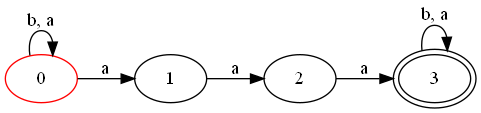

In [20]:
automate.show(1.2)

- `addTransition : Transition -> bool`<br>
  prend en argument une transition `t`, fait la mise à jour de
  l'automate en lui ajoutant `t` et ajoute les états impliqués
  dans l'automate s'ils en sont absents. Elle rend `True` si l'ajout a
  eu lieu, `False` sinon (si `t` était déjà présente dans l'automate).
  
- `removeTransition : Transition -> bool`<br>
  prend en argument une transition `t` et fait la mise à jour de
  l'automate en lui enlevant la transition, sans modifier les
  états. Elle rend `True` si la suppression a eu lieu, `False` sinon (si
  `t` était absente de l'automate).

- `addState : State -> bool`<br>
  prend en argument un état `s` et fait la mise à jour de
  l'automate en lui ajoutant `s`.  Elle rend `True` si l'ajout a eu
  lieu, `False` sinon (si `s` était déjà présent dans l'automate).

- `nextId : -> int`<br>
  renvoie un entier id frais, en choisissant l'entier le plus petit,
  strictement supérieur à tous les id des états de l'automate.

- `removeState : State -> bool`<br>
  prend en argument un état `s` et fait la mise à jour de
  l'automate en supprimant `s` ainsi que toutes ses transitions
  entrantes et sortantes.  Elle rend `True` si l'ajout a eu lieu, `False`
  sinon (si `s` était absent de l'automate).
  
- `getSetInitialStates :  -> set[State]`<br> 
  rend l'ensemble des états initiaux.

- `getSetFinalStates :  -> set[State]`<br>
  rend l'ensemble des états finaux.

- `getSetTransitionsFrom : State -> set[Transition]`<br>
  rend l'ensemble des transitions sortant de l'état passé en argument.

- `prefixStates : int -> NoneType`<br>
  modifie les identifiants et les étiquettes de tous les états de
  l'automate en les préfixant par l'entier passé en argument.

- `succElem : State x str -> set[State]`<br>
  étant donné un état `s` et un caractère `a`, elle rend l'ensemble des
  états successeurs de `s` par le caractère `a`.  Formellement,
  
  $$succElem(s, a) = \{s' \in S \mid  s \xrightarrow{a} s'\}.$$
  
  Cet ensemble peut contenir plusieurs états si l'automate n'est pas déterministe.

In [21]:
# Voilà le code de succElem

def succElem(self, state, lettre):
    """ State x str -> set[State]
        rend l'ensemble des états accessibles à partir d'un état state par l'étiquette lettre
    """
    successeurs = set()
    # t: Transitions
    for t in self.getSetTransitionsFrom(state):
        if t.etiquette == lettre:
            successeurs.add(t.stateDest)
    return successeurs

Automate.succElem = succElem

Avec l'exemple précédent, on obtient :

In [22]:
s0 = list(automate.getSetInitialStates())[0] ## on récupère l'état initial de automate
automate.succElem(s0, 'a')

{0(init), 1}

### 2. Prise en mains  <a class="anchor" id="sec2"></a>

#### 2.1 Création d'automates <a class="anchor" id="sec2_1"></a>

Soit l'automate $\mathcal{A}$ défini sur l'alphabet $\{ a,b \}$, d'états $0,1,2$, 
d'état initial 0, d'état final 2 et de transitions : <br>$(0,a,0)$, $(0,b,1)$, 
$(1,a,2)$, $(1,b,2)$, $(2,a,0)$ et $(2,b,1)$.

1. Créer l'automate $\mathcal{A}$ à l'aide de son ensemble de transitions. Pour cela, créer un état `s0`  
d'identifiant $0$
  qui soit initial, un état `s1` d'identifiant $1$ et un état
  `s2` d'identifiant $2$ qui soit final. Puis créer `t1`, `t2`, `t3`, `t4`, `t5` et
  `t6` les 6 transitions de l'automate. Créer enfin l'automate
  `auto` à partir de ses transitions, par exemple avec l'appel<br>
  `auto = Automate({t1,t2,t3,t4,t5,t6})`.<br>
  Vérifier que l'automate correspond bien à $\mathcal{A}$ en l'affichant.

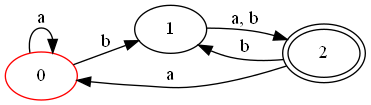

In [23]:
s0 = State(0, True, False )
s1 = State(1, False, False)

s2 = State(2, False, True)

## création de transitions
# t1 : Transition
t1 = Transition(s0,"a",s0)
# t2 : Transition
t2 = Transition(s0,"b",s1)
# t3 : Transition
t3 = Transition(s1,"a",s2)
# t4 : Transition
t4 = Transition(s1,"b",s2)
# t5 : Transition
t5 = Transition(s2,"a",s0)
t6 = Transition(s2,"b",s1)
# set_transitions : set[Transition]
set_transitions = {t1, t2, t3, t4, t5,t6}
set_state ={s0 , s1 , s2} 

## création de l'automate
# aut : Automate
auto = Automate(set_transitions)
auto.show(1.6)

2. Créer l'automate $\mathcal{A}$ à l'aide de sa liste de
  transitions et d'états, par exemple à l'aide de l'appel<br>
  `auto1 = Automate({t1,t2,t3,t4,t5,t6}, {s0,s1,s2})`<br>
  puis afficher l'automate obtenu à l'aide de `print` puis à l'aide de `show`.
  Vérifier que l'automate `auto1` est bien
  identique à l'automate `auto`.

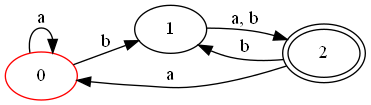

In [24]:
auto1 = Automate(set_transitions , set_state)
auto1.show()

3. Créer l'automate $\mathcal{A}$ à partir d'un fichier. Pour cela,
  créer un fichier `auto2.txt`, dans lequel sont indiqués les
  listes des états et des transitions, ainsi que l'état initial et
  l'état final, en respectant la syntaxe donnée dans la section
  précédente. Par exemple la liste d'états est décrite par la ligne
  `#E: 0 1 2`.  Utiliser ensuite par exemple l'appel
  `auto2 = Automate.creationAutomate("ExemplesAutomates/auto2.txt")`, puis afficher
  l'automate `auto2` à l'aide de `print` ainsi qu'à l'aide de `show`.

Etats :
  0(init)
  1
  2
  3(fin)
Transitions :
  [3(fin)-b->3(fin)]
  [1-a->2]
  [0(init)-a->1]
  [1-a->3(fin)]
  [0(init)-b->0(init)]
  [0(init)-a->0(init)]
  [3(fin)-a->3(fin)]



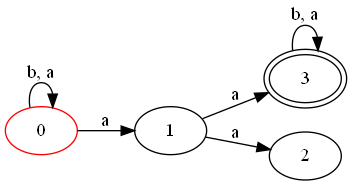

In [25]:
auto2 = Automate.creationAutomate("ExemplesAutomates/auto2.txt")
print(auto2)
auto2.show()

#### 2.2 Premières manipulations <a class="anchor" id="sec2_2"></a>

1. Appeler la fonction `removeTransition` sur l'automate
  `auto` en lui donnant en argument la transition $(0,a,1)$. Il
  s'agit donc de créer une variable `t` de type
  `Transition` représentant $(0,a,1)$ et d'effectuer l'appel
  `auto.removeTransition(t)`. Observer le résultat sur un
  affichage.  Appeler ensuite cette fonction sur `auto` en lui
  donnant en argument la transition `t1`. Observer le résultat
  sur un affichage. Appeler la fonction `addTransition` sur
  l'automate `auto` en lui donnant en argument la transition
  `t1`. Vérifier que l'automate obtenu est bien le même
  qu'initialement.

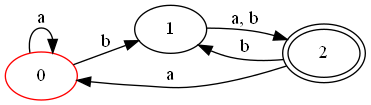

In [26]:
t = Transition(s0 , "a" , s1)
auto.show()

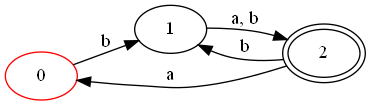

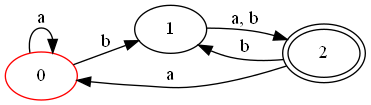

In [27]:
auto.removeTransition(t1)
auto.show()

# rajouter la transition t1
auto.addTransition(t1)
auto.show()

2. Appeler la fonction `removeState` sur l'automate
  `auto` en lui donnant en argument l'état
  `s1`. Observer le résultat. Appeler la fonction
  `addState` sur l'automate `auto` en lui donnant en
  argument l'état `s1`. Créer un état `s0bis` d'identifiant
  $0$ et initial. Appeler la fonction `addState` sur
  `auto` avec `s0bis` comme argument. Observer le résultat.

on a enlever le node s1


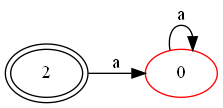

on remet le node s1 mais il n'y a plus les liaisons de s1


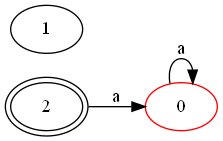

In [28]:
auto.removeState(s1)
print("on a enlever le node s1")
auto.show()

auto.addState(s1)
print("on remet le node s1 mais il n'y a plus les liaisons de s1")
auto.show()

3. Appeler la fonction `getSetTransitionsFrom` sur
  l'automate `auto1` avec `s1` comme argument. Afficher
  le résultat.

In [29]:
auto1.getSetTransitionsFrom(s1)

{[1-a->2(fin)], [1-b->2(fin)]}

## Initialisation d'automates pour les tests

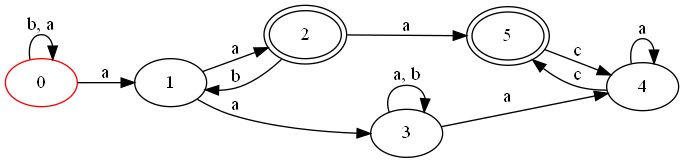

In [30]:
auto3 = Automate.creationAutomate("ExemplesAutomates/auto3.txt")
auto3.show()

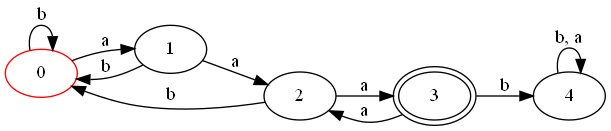

In [31]:
auto4 = Automate.creationAutomate("ExemplesAutomates/auto4.txt")
auto4.show()

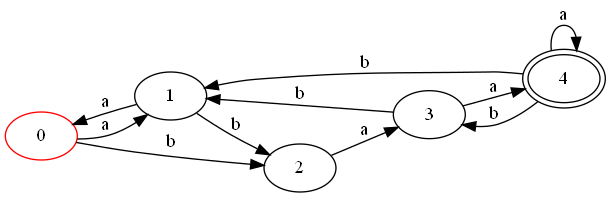

In [32]:
auto5 = Automate.creationAutomate("ExemplesAutomates/auto5.txt")
auto5.show()

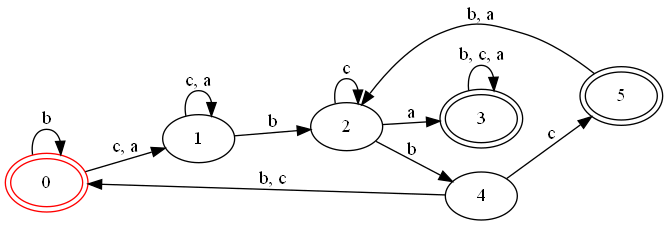

In [33]:
auto6 = Automate.creationAutomate("ExemplesAutomates/auto6.txt")
auto6.show()

In [34]:
def return_list_states(self):
    """ Cette fonction renvoie la liste des état de l'automate"""
    return [i for i in self.allStates]

Automate.return_list_states = return_list_states

### 3. Exercices de base : tests et complétion  <a class="anchor" id="sec3"></a>

1. Donner une définition de la fonction `succ`
  qui, étant donné un ensemble d'états $S$ et une chaîne de caractères
      $a$ (de longueur 1), renvoie l'ensemble des états successeurs de tous les états de $L$ par le caractère $a$. Cette fonction doit généraliser la fonction `succElem` pour qu'elle prenne en paramètre un ensemble d'états au lieu d'un seul état.  Formellement, si $S$ est un ensemble d'états et $a$ une lettre,
  $$succ(S,a) = \bigcup_{s \in S}succ(s,a) = \{s' \in S \mid \mbox{il
    existe } s \in L \mbox{ tel que } s \xrightarrow{a} s'\}.$$

In [35]:
def succ(self, setStates, lettre):
    """ Automate x set[State] x str -> set[State]
        rend l'ensemble des états accessibles à partir de l'ensemble d'états setStates par l'étiquette lettre
    """
    succ = set()
    for node in setStates:
        nodes_set = self.succElem(node , lettre)
        succ |= nodes_set
    return succ

Automate.succ = succ

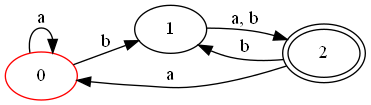

---


In [36]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.succ({s0, s2}, 'b') == {s1}
assert auto1.succ({s0}, 'a') == {s0}
assert auto1.succ({s0, s1}, 'a') == {s0, s2}
assert auto1.succ({s1, s2}, 'b') == {s1,s2}
assert auto1.succ({s1, s2}, 'a') == {s0, s2}
assert auto1.succ({s0, s1, s2}, 'a') == {s0, s2}
assert auto1.succ({s0, s1, s2}, 'c') == set()
assert auto1.succ({s1}, 'a') == {s2}

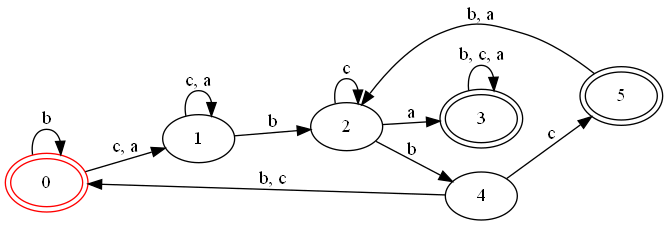

---


In [37]:
auto6.show()
print('---')
state_auto6 = auto6.return_list_states()
assert auto6.succ({state_auto6[5],state_auto6[2]} , 'a') == {state_auto6[2],state_auto6[3]} 
assert auto6.succ({state_auto6[3]}, 'a') == {state_auto6[3]}
assert auto6.succ({state_auto6[1],state_auto6[2]} , 'c') == {state_auto6[1],state_auto6[2]}
assert auto6.succ({state_auto6[5], state_auto6[0], state_auto6[2]} , 'b') == {state_auto6[0],state_auto6[2],state_auto6[4]}

2. Donner une définition de la fonction `accepte`
  qui, étant donné une chaîne de caractères `mot`,
  renvoie un booléen qui vaut vrai si et seulement si `mot` est accepté par l'automate. Attention, noter que l'automate peut ne pas être déterministe.

In [38]:
def accepte(self, mot , verbose = True) :
    """ Automate x str -> bool
        rend True si auto accepte mot, False sinon
    """
    nodes_init_set = self.getSetInitialStates()
    nodes_final_set = self.getSetFinalStates()
    Alphabet = {t.etiquette for t in self.allTransitions}
    
    for lettre in range(len(mot)):
        
        # Vérification que la lettre est bien dans l'alphabet de l'automate 
        if mot[lettre] not in Alphabet:
            if verbose :
                print("La lettre : " + mot[lettre] + " n'est pas dans l'alphabet de l'automate")
            return False
        
        # Récupération des état suivant selon la lettre
        set_of_targets = self.succ(nodes_init_set , mot[lettre])
        
        # Vérification de l'existance d'un chemin entre les deux états avec la lettre 
        if set_of_targets == set():
            if verbose:
                print("La " + str(lettre) + " ième lettre : " +"'" + mot[lettre] + "'"+ " ne peux pas être présente")
            return False
        
        # Vérifiaction que la derniere du mot est bien sur un état final
        if lettre == len(mot)-1:
            
            # On verifie que l'intersection entre le targets et les états finaux n'est pas nulle 
            if (set_of_targets & nodes_final_set) != set():# incusion entre deux ensembles
                return True
            else:
                if verbose:
                    print("La dernière lettre du mot n'est pas au niveau d'un état final")
                return False
            
            
        nodes_init_set = set_of_targets  
    return True

Automate.accepte = accepte

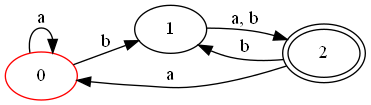

---
La dernière lettre du mot n'est pas au niveau d'un état final
La dernière lettre du mot n'est pas au niveau d'un état final
La dernière lettre du mot n'est pas au niveau d'un état final


In [39]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.accepte('aa') == False
assert auto1.accepte('ab') == False
assert auto1.accepte('aba') == True
assert auto1.accepte('aaaaaaabb') == True
assert auto1.accepte('abbbbbbbabb') == True
assert auto1.accepte('abab') == False

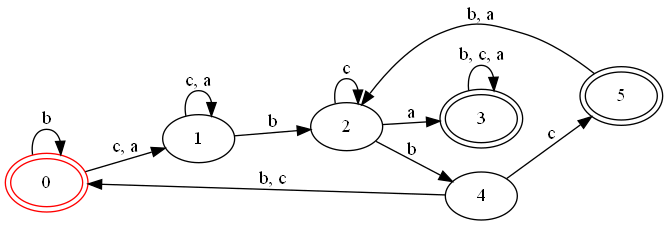

---
La dernière lettre du mot n'est pas au niveau d'un état final
La lettre : z n'est pas dans l'alphabet de l'automate
La 3 ième lettre : 'a' ne peux pas être présente


In [40]:
auto6.show()
print('---')
state_auto6 = auto6.return_list_states()
assert auto6.accepte('bccbbbaba') == True
assert auto6.accepte('b') == True
assert auto6.accepte('ba') == False
assert auto6.accepte('bacccccccccccccccccccccccbcccccccccccbcabcbbbbbbbb') == True
assert auto6.accepte('bbbbbbbbbbbbbbbbbbbbaaaaaaccccbcca') == True
assert auto6.accepte('bacabcbcbbacbcbc') == True
assert auto6.accepte('baz') == False
assert auto6.accepte('abba') == False
assert auto6.accepte('abbcbb') == True

3. Donner une définition de la fonction `estComplet`
    qui, étant donné un automate `auto` et un ensemble de caractères `Alphabet`
    renvoie un booléen qui vaut vrai si et
    seulement si `auto` est complet par rapport à l'alphabet.
    
    On n'effectuera pas la vérification sur les états non accessibles depuis les états initiaux.

In [41]:
def estComplet(self, Alphabet, verbose = True) :
    """ Automate x set[str] -> bool
        rend True si auto est complet pour les lettres de Alphabet, False sinon
        hyp : les éléments de Alphabet sont de longueur 1
        
        
        CETTE FONCTION MARCHE POUR TOUT AUTOMATE DE N'IMPORTE QUELLE TAILLE
    """
    
    all_states = self.allStates
    automate_alphabet = [trans.etiquette for trans in self.allTransitions] # self.getAlphabetFromTransitions()
    
    # Vérification de la présence de toute les lettres de l'alphabet en paramètres dans l'automate
    for lettre in Alphabet:
        if lettre not in automate_alphabet:
            if verbose:
                print("La lettre: " +"'"+lettre + "'"+" ne se trouve dans pas l'automate")
            return False 
    
    # Vérification que chaque state possède une transition sortante pour toutes les lettres de l'alphabet
    for state in all_states:
        for lettre in Alphabet:
            if self.succ({state}, lettre) == set():
                if verbose:
                    print("L'état: "+ str(state.label) + " ne possède pas de transition sortante: " + "'"+lettre+"'")
                return False
        
    return True

Automate.estComplet = estComplet

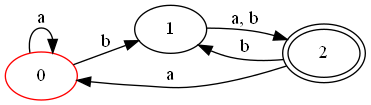

---
La lettre: 'c' ne se trouve dans pas l'automate


In [42]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.estComplet({'a', 'b'}) == True
assert auto1.estComplet({'a', 'c', 'b'}) == False

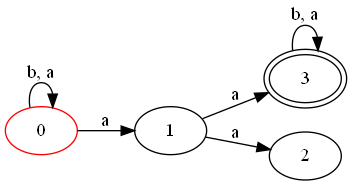

---
L'état: 1 ne possède pas de transition sortante: 'b'
L'état: 2 ne possède pas de transition sortante: 'a'
La lettre: 'c' ne se trouve dans pas l'automate
L'état: 1 ne possède pas de transition sortante: 'b'


In [43]:
auto2.show()
print('---')
assert auto2.estComplet({'a', 'b'}) == False
assert auto2.estComplet({'a'}) == False
assert auto2.estComplet({'a', 'c', 'b'}) == False
assert auto2.estComplet({'b'}) == False

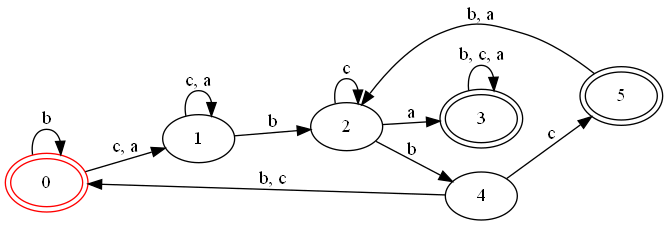

---
L'état: 4 ne possède pas de transition sortante: 'a'
La lettre: 'w' ne se trouve dans pas l'automate


In [44]:
auto6.show()
print('---')
assert auto6.estComplet({'a','b','c'}) == False
assert auto6.estComplet({'b'}) == True
assert auto6.estComplet({'b','w'}) == False

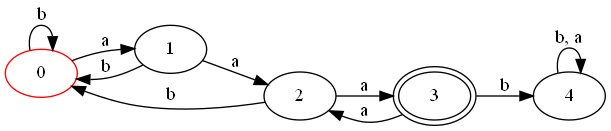

---
La lettre: 'w' ne se trouve dans pas l'automate


In [45]:
auto4.show()
print('---')
assert auto4.estComplet({'a','b'}) == True
assert auto4.estComplet({'b'}) == True
assert auto4.estComplet({'z','w'}) == False

4. Donner une définition de la fonction `estDeterministe`
qui, étant donné un automate `auto`,
 renvoie un booléen qui vaut vrai si et seulement si `auto` est déterministe.

In [46]:
def estDeterministe(self, verbose = True) :
    """ Automate -> bool
        rend True si auto est déterministe, False sinon
        
        CETTE FONCTION MARCHE POUR TOUT AUTOMATE DE N'IMPORTE QUELLE TAILLE
    """
    if len(self.getSetInitialStates()) > 1 :
        return False
    all_states = [i for i in self.allStates]
    
    
    for state in all_states:
        # Récupération des labels (lettres) de toutes les transitions sortante de l'état en cours de traitement
        transitions_node_labels = [trans.etiquette for trans in self.getSetTransitionsFrom(state)]
        
        for transition_label in transitions_node_labels:
            # Vérification qu'il n'y a pas deux transitions sortante de l'état possèdant le même label 
            if transitions_node_labels.count(transition_label) >= 2:
                if verbose:
                    print("L'état: " + str(state.label) + " possède " + str(transitions_node_labels.count(transition_label)) + " transitions sortant: "+ transition_label)
                return False
    return True 
    
Automate.estDeterministe = estDeterministe

L'appel de fonction `copy.deepcopy(auto)` renvoie un nouvel automate identique à `auto`.

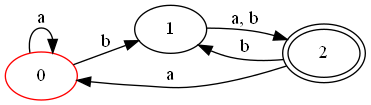

---


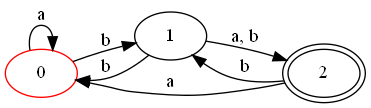

---
L'état: 1 possède 2 transitions sortant: b


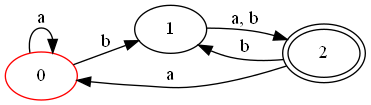

---


In [47]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.estDeterministe() == True

auto1bis = copy.deepcopy(auto1)
#t : Transition
t = Transition(s1, 'b', s0)
auto1bis.addTransition(t)
auto1bis.show()
print('---')
assert auto1bis.estDeterministe() == False

auto1bis.removeTransition(t)
auto1bis.show()
print('---')
assert auto1bis.estDeterministe() == True

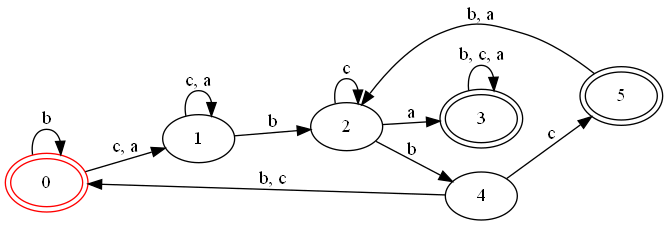

---
L'état: 4 possède 2 transitions sortant: c


In [48]:
auto6.show()
print('---')
assert auto6.estDeterministe() == False

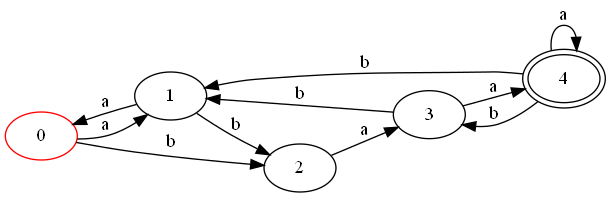

---
L'état: 4 possède 2 transitions sortant: b


In [49]:
auto5.show()
print('---')
assert auto5.estDeterministe() == False

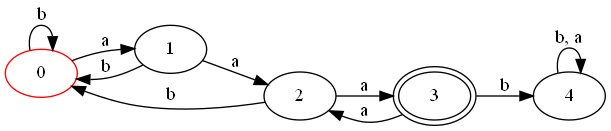

---


In [50]:
auto4.show()
print('---')
assert auto4.estDeterministe()==True

5. Donner une définition de la fonction `completeAutomate`
qui, étant donné un automate `auto` et l'ensemble alphabet d'entrée `Alphabet`,
renvoie l'automate complété d'`auto`.
  
Attention, il ne faut pas modifier `auto`, mais construire un nouvel automate.
<br>Il pourra être intéressant d'utiliser l'appel de fonction
`copy.deepcopy(auto)` qui renvoie un nouvel automate identique à `auto`.
<br>On pourra faire appel à la fonction `nextId` afin de construire l'état $\bot$.

In [51]:
def completeAutomate(self, Alphabet) :
    """ Automate x str -> Automate
        rend l'automate complété de self, par rapport à Alphabet
    """
    # Vérification si l'automate est complet ou non 
    if self.estComplet(Alphabet, False):
        return self
    
    else:
        # Création de la copie de l'automate
        new_automate = copy.deepcopy(self)
        
        # Création et ajout d'un nouvel état "Puit"
        new_state = State(self.nextId(), False , False , "Puit")
        new_automate.addState(new_state)
        
        # Récupération de tous les état du nouvel automate "Puit" comprit
        new_automate_all_states = [i for i in new_automate.allStates]
        
        for state in new_automate_all_states:
            for lettre in Alphabet:
                
                # Si il n'y a pas de transtion sortant de l'etat avec la lettre alors on créer la transition vers le "Puit"
                if self.succ({state} , lettre) == set():
                    transition_temp = Transition(state , lettre , new_state)
                    new_automate.addTransition(transition_temp)
                    
    return new_automate

Automate.completeAutomate = completeAutomate

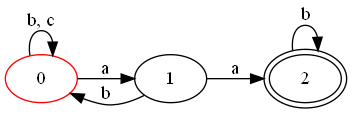

L'état: 1 ne possède pas de transition sortante: 'c'
L'automate est il complet : False


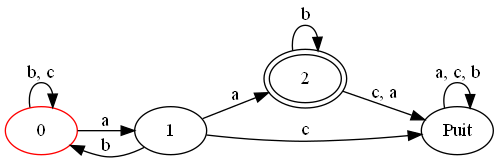

---


In [52]:
auto_not_comp = Automate.creationAutomate("ExemplesAutomates/auto_not_comp.txt")
auto_not_comp.show()
print("L'automate est il complet : " + str(auto_not_comp.estComplet({'a' , 'b' , 'c'}) ))
auto_comp = auto_not_comp.completeAutomate({'a','b','c'})
auto_comp.show()
print('---')
assert auto_comp.estComplet({'a','b','c'})==True

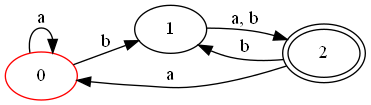

---


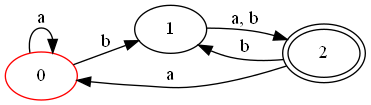

---


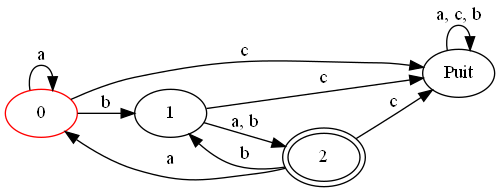

In [53]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant :
auto1.show()
print('---')
assert auto1.estComplet({'a', 'b'}) == True
auto1complet = auto1.completeAutomate({'a', 'b'})
auto1complet.show()
assert auto1complet.estComplet({'a', 'b'}) == True

print('---')
assert auto1.estComplet({'a', 'b', 'c'}, verbose = False) == False
auto1complet = auto1.completeAutomate({'a', 'b', 'c'})
auto1complet.show()
assert auto1complet.estComplet({'a', 'b','c'}) == True

### 4. Déterminisation  <a class="anchor" id="sec4"></a>

1. Donner une définition de la fonction `newLabel`
qui, étant donné un ensemble d'états renvoie une *chaîne de caractères* représentant l'ensemble de tous les labels des états.
Par exemple, l'appel de `newLabel` sur un ensemble de 3 états dont les labels sont `'1', '2', '3'` renvoie `'{1,2,3}'`

Afin d'être assuré que l'ordre de parcours de l'ensemble des états n'a pas d'importance, il sera nécessaire de trier par ordre alphabétique la liste des `label` des états. On pourra faire appel à `L.sort()` qui étant donné la liste `L` de chaînes de caractères, la trie en ordre alphabétique.

In [54]:
def newLabel(S):
    """ set[State] -> str
    """
    set_sort = [state.label for state in S]
    set_sort.sort
    res = "{"
    for l in range(len(set_sort)):
        if l == 0:
            res += str(set_sort[l])
        else:
            res += "," + set_sort[l]
    res += "}"
    return res 

In [55]:
assert newLabel(auto1.allStates) == '{0,1,2}'
assert newLabel({}) == '{}'
assert newLabel(auto3.allStates) == '{0,1,2,3,4,5}'
assert newLabel(auto6.allStates) == '{0,1,2,3,4,5}'
assert newLabel(auto5.allStates) == '{0,1,2,3,4}'

La fonction suivante permet de déterminiser un automate. On remarque qu'un état peut servir de clé dans un dictionnaire.

In [56]:
def determinisation(self) :
    """ Automate -> Automate
    rend l'automate déterminisé de self """
    # Ini : set[State]
    Ini = self.getSetInitialStates()
    # fin : bool
    fin = False
    # e : State
    for e in Ini:
        if e.fin:
            fin = True
    lab = newLabel(Ini)
    s = State(0, True, fin, lab)
    A = Automate(set())
    A.addState(s)
    Alphabet = {t.etiquette for t in self.allTransitions}
    Etats = dict()
    Etats[s] = Ini
    A.determinisation_etats(self, Alphabet,[s], 0, Etats,{lab})
    return A

L'automate déterminisé est construit dans `A`. Pour cela la fonction récursive `determinisation_etats` modifie en place l'automate `A`, et prend en outre les paramètres suivants :
- `auto`, qui est l'automate de départ à déterminiser
- `Alphabet` qui contient l'ensemble des lettres étiquetant les transistions de l'automate de départ
- `ListeEtatsATraiter` qui est la liste des états à ajouter et à traiter dans `A` au fur et à mesure que l'on progresse dans `auto`.
- `i` qui est l'indice de l'état en cours de traitement (dans la liste `ListeEtatsATraiter`).
- `Etats` qui est un dictionnaire dont les clés sont les états de `A` et les valeurs associées sont l'ensemble d'états issus de `auto` que cette clé représente.
- `DejaVus` est l'ensemble des labels d'états de `A` déjà vus.

In [57]:
def determinisation_etats(self, auto, Alphabet, ListeEtatsATraiter, i, Etats, DejaVus):
    """ Automate x Automate x set[str] x list[State] x int x dict[State : set[State]], set[str] -> NoneType
    """
    if len(ListeEtatsATraiter) == 0:
        return 1 

    ListeEtatsATraiter_temp = copy.deepcopy(ListeEtatsATraiter)
    
    # Reinitialistation de la liste des états à traiter
    ListeEtatsATraiter = [] 
    
    for Etat_Atraiter in  ListeEtatsATraiter_temp:
        for lettre in Alphabet:
            
            # Update des états déja vus à chaques tours de boucles
            DejaVus.update({i.label for i in self.allStates})
            
            # Récupération des états cibles
            targets_set = auto.succ(Etats[Etat_Atraiter], lettre)
            
            # Création du nouveau label en combinant ceux de la cible
            targets_label = newLabel(targets_set)
            
            is_final = False
               
            # Traitement des états déja créer dans le nouvel automates
            if targets_label in DejaVus:
                
                # Recherche dans le dictionnaire de relation entre les états du nvl automate et ceux de l'ancien
                for key in Etats.keys():
                    if key.label == targets_label:
                        key_of_target = key
       
                # Création de la nouvelle transition reliant état à traiter et la clé récuperée 
                new_trans = Transition(Etat_Atraiter , lettre , key_of_target)
                self.addTransition(new_trans)
                
            # Traitement et création des nouveaux états   
            else:
                # Verification de la finalité du nouvel état
                for target in targets_set:
                    if target in auto.getSetFinalStates():
                        is_final = True
                
                # Création du nouvel état et de la nouvelle transition 
                new_state1 = State(self.nextId(), False , is_final, targets_label)
                self.addState(new_state1)
                new_trans1 = Transition(Etat_Atraiter , lettre , new_state1)
                self.addTransition(new_trans1)
                
                # Ajout du nouvel état a la liste états à traiter pour le prochain tour
                ListeEtatsATraiter.append(new_state1)
                # Ajout dans Etat du nouvel état et de sa correspondance avec l'ancien automate 
                Etats[new_state1] = targets_set
                
    return determinisation_etats(self,auto , Alphabet , ListeEtatsATraiter , i+1 , Etats ,DejaVus)

Automate.determinisation_etats = determinisation_etats
Automate.determinisation = determinisation

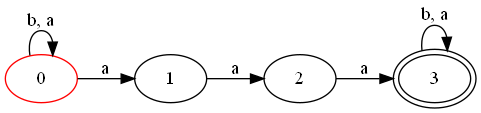

L'état: 0 possède 2 transitions sortant: a
Cet automate est il déterministe : False




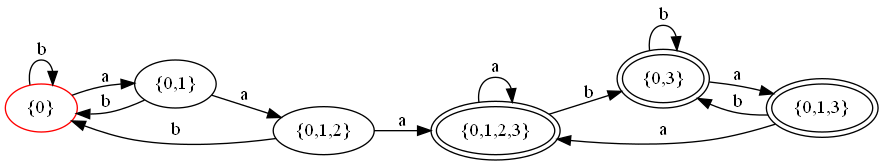

Cet automate est il déterministe : True


In [58]:
# Voici un test
#automate est l'automate construit plus haut a partir du fichier exempleAutomate.txt
automate = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
automate.show()
print("Cet automate est il déterministe : " + str(automate.estDeterministe()))
auto_det = automate.determinisation()
print("\n")
auto_det.show(2)
print("Cet automate est il déterministe : " + str(auto_det.estDeterministe()))

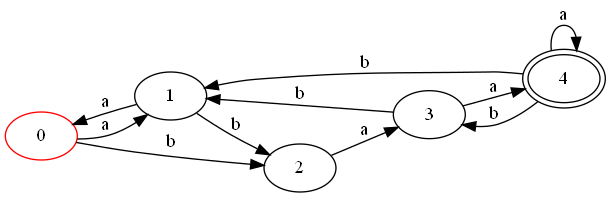

Cet automate est il déterministe : False




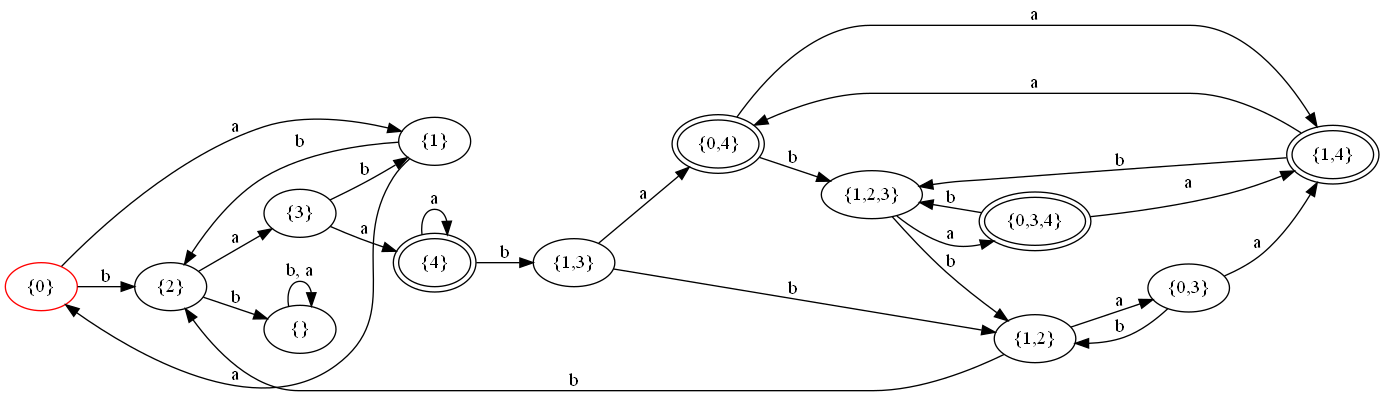

Cet automate est il déterministe : True
cet automate est il complet : True


In [59]:
auto5.show()
print("Cet automate est il déterministe : " + str(auto5.estDeterministe(verbose = False)))
auto5_det = auto5.determinisation()
print("\n")
auto5_det.show(2)
print("Cet automate est il déterministe : " + str(auto5_det.estDeterministe(verbose = False)))
print("cet automate est il complet : " + str(auto5_det.estComplet({"a" ,"b"})))

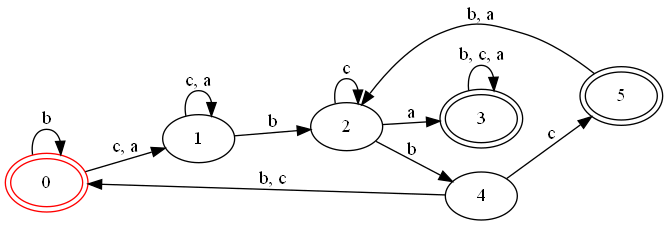

Cet automate est il déterministe : False




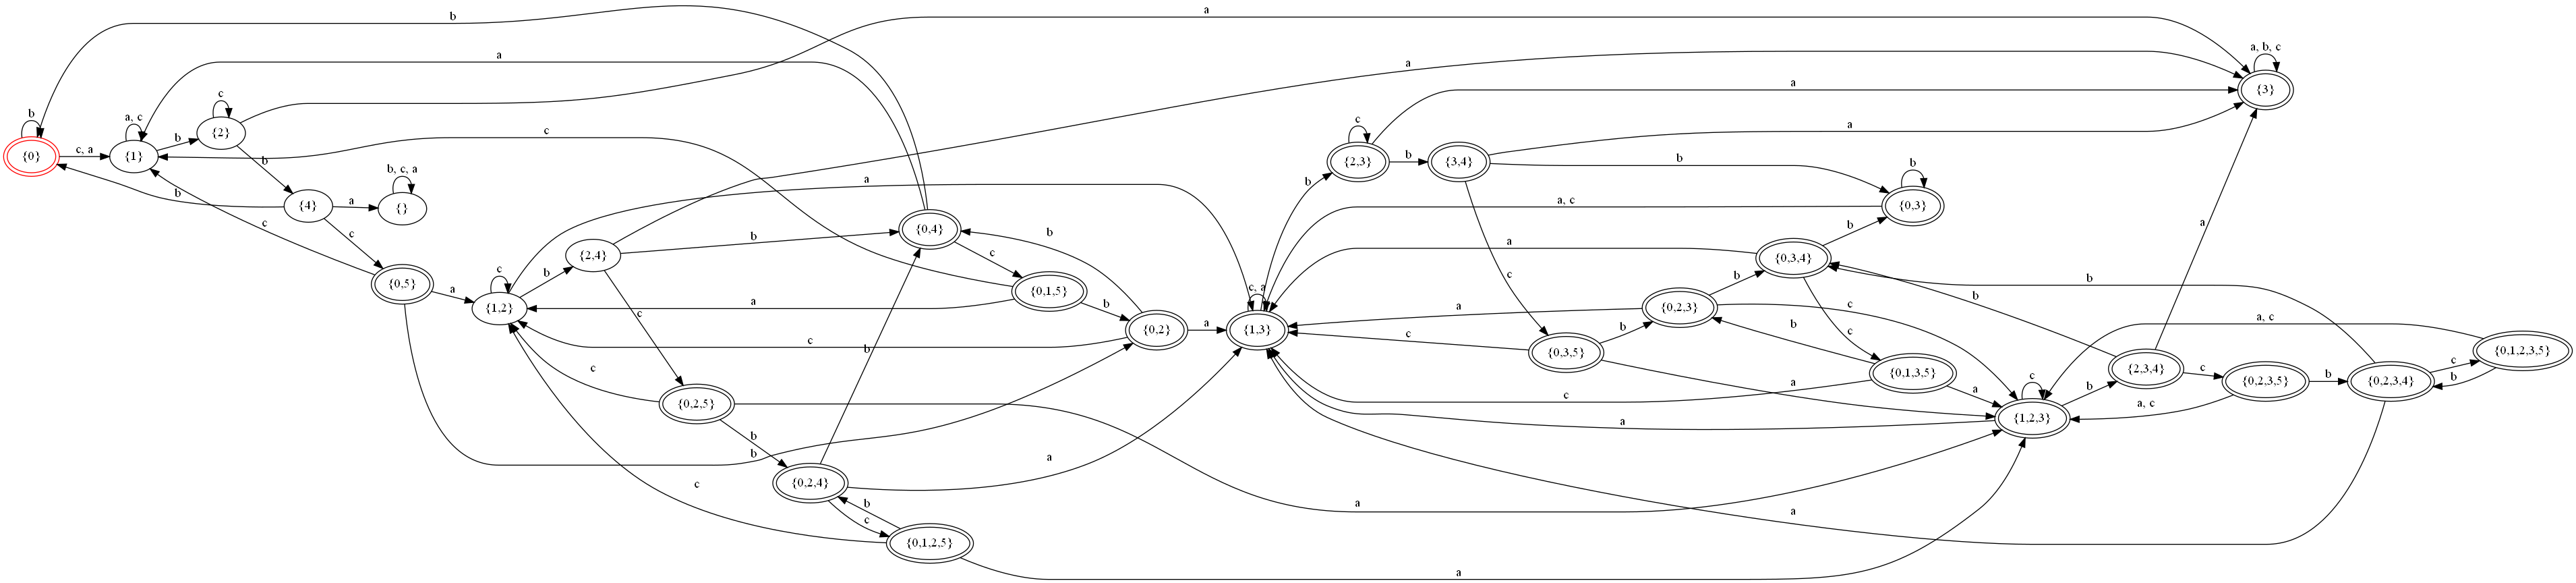

Cet automate est il déterministe : True
cet automate est il complet : True


In [60]:
auto6.show()
print("Cet automate est il déterministe : " + str(auto6.estDeterministe(verbose = False)))
auto6_det = auto6.determinisation()
print("\n")
Alphabet = {t.etiquette for t in auto6.allTransitions}
auto6_det.show(9)
print("Cet automate est il déterministe : " + str(auto6_det.estDeterministe(verbose = False)))
print("cet automate est il complet : " + str(auto6_det.estComplet({"a" ,"b"})))

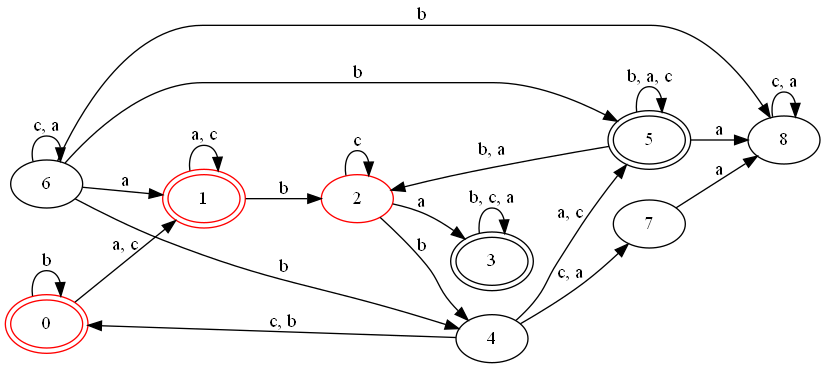

Cet automate est il déterministe : False




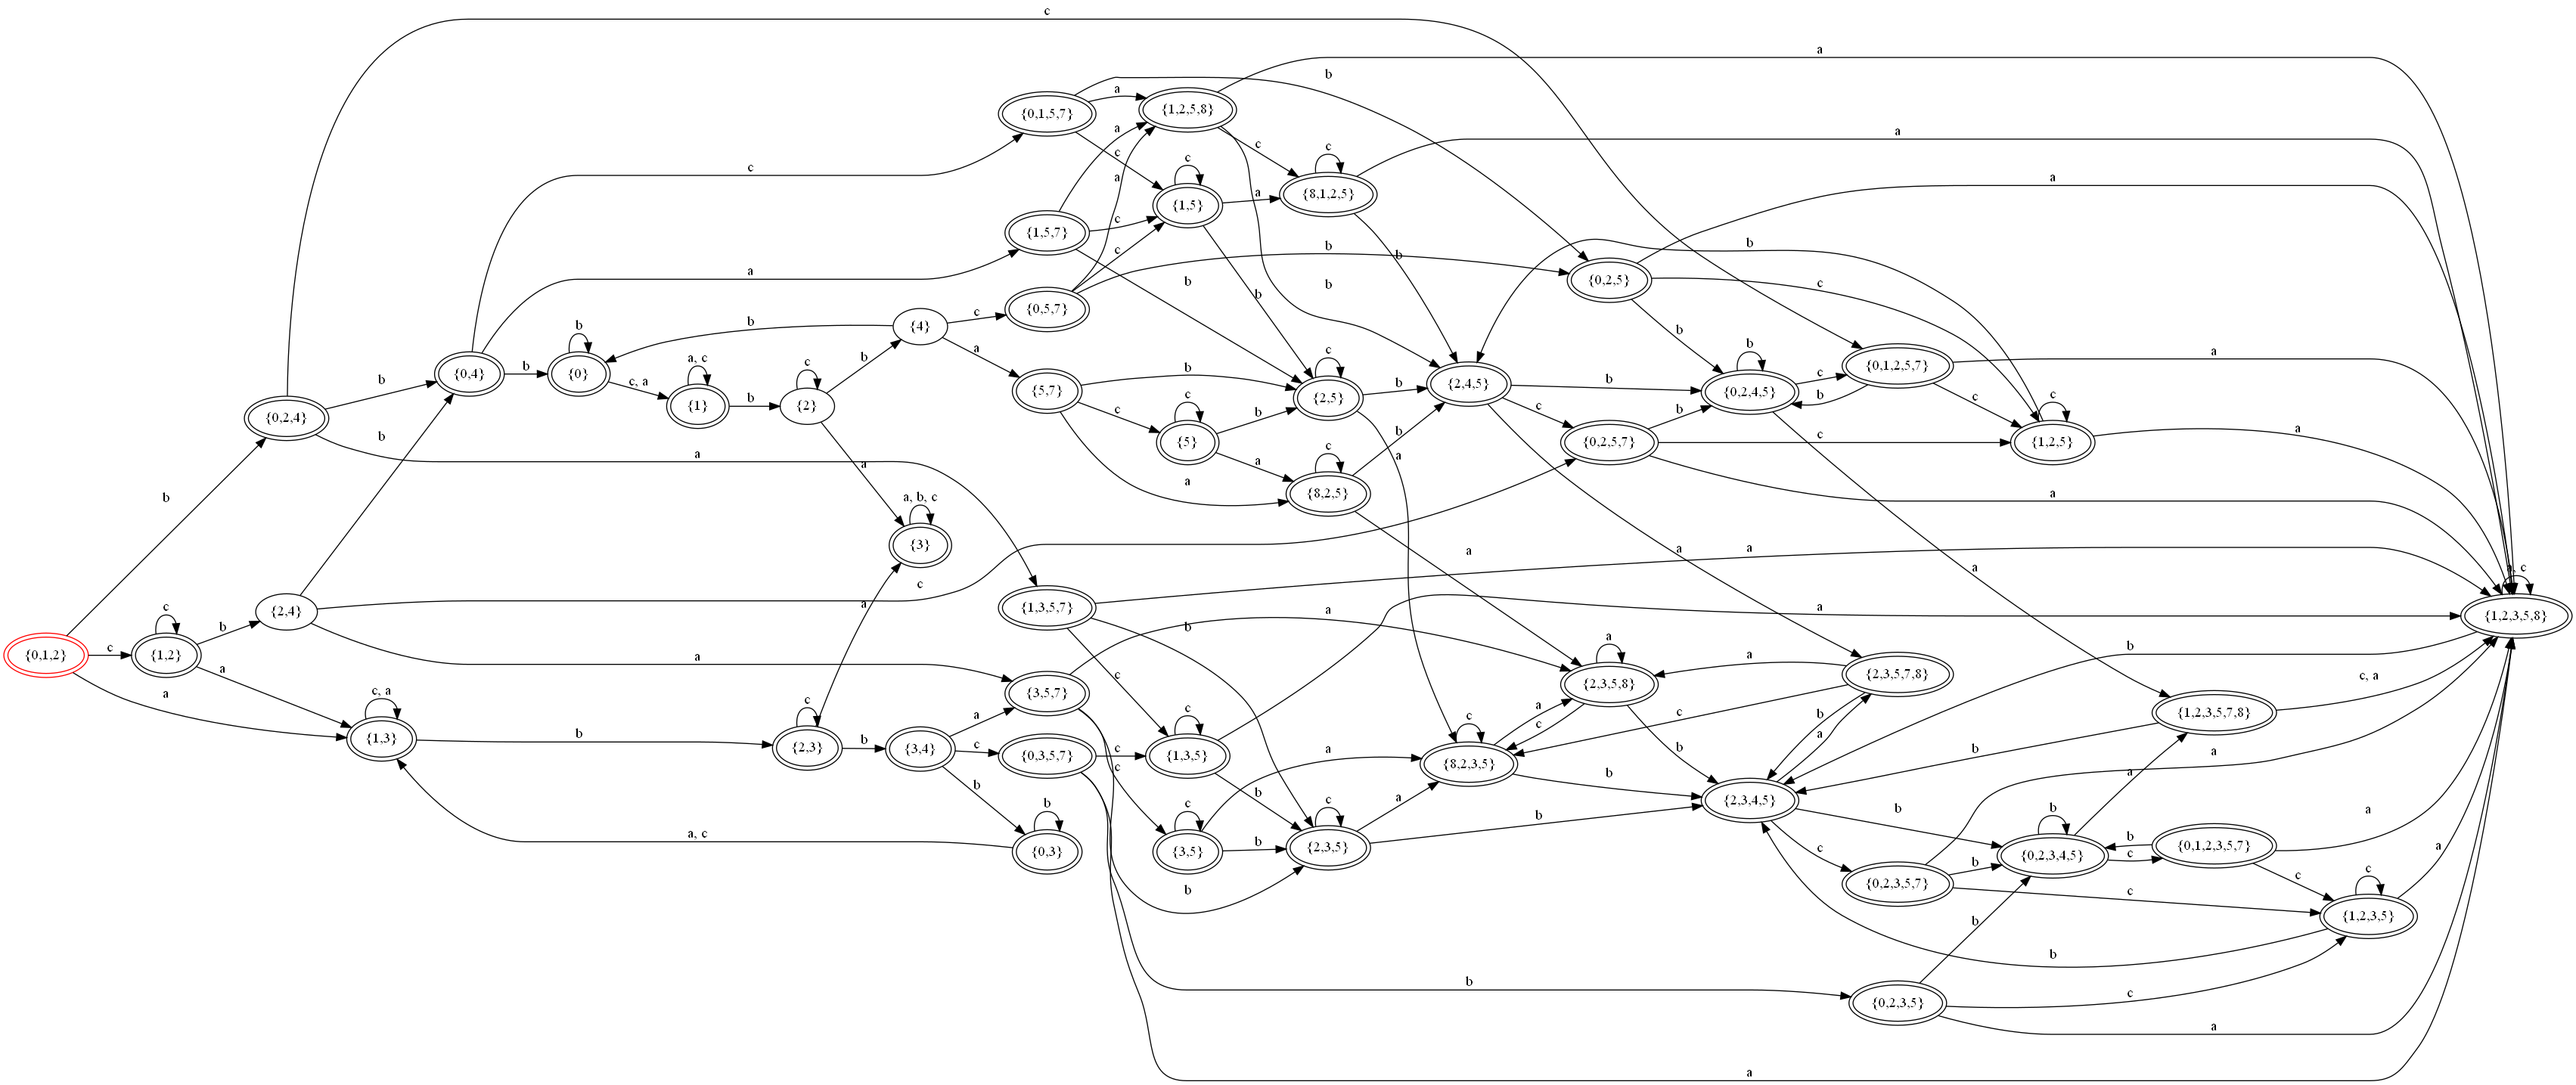

Cet automate est il déterministe : True
cet automate est il complet : True


In [61]:
auto7 = Automate.creationAutomate("ExemplesAutomates/auto7.txt")
auto7.show()
print("Cet automate est il déterministe : " + str(auto7.estDeterministe(verbose = False)))
auto7_det = auto7.determinisation()
print("\n")
Alphabet = {t.etiquette for t in auto7.allTransitions}
auto7_det.show(9)
print("Cet automate est il déterministe : " + str(auto7_det.estDeterministe(verbose = False)))
print("cet automate est il complet : " + str(auto7_det.estComplet({"a" ,"b","c"})))

##  !!! On peut remarquer que la fonction de déterminisation complete aussi l'automate !!!

### 5. Constructions sur les automates réalisant  des opérations sur les langages acceptés <a class="anchor" id="sec5"></a>


#### 5.1 Opérations ensemblistes sur les langages <a class="anchor" id="sec5_1"></a>

1. Donner une définition de la fonction `complementaire` qui, étant donné un automate `auto` et un ensemble de caractères `Alphabet`, renvoie l'automate acceptant la langage complémentaire du langage accepté par `auto`. Ne pas modifier l'automate `auto`, mais construire un nouvel automate.

In [62]:
def complementaire(self, Alphabet):
    """ Automate -> Automate
        rend  l'automate acceptant pour langage le complémentaire du langage de self
    """
    auto_copie = copy.deepcopy(self)
    
    # Déterminisation de l'automate copy
    auto_detreministe = auto_copie.determinisation()
    # Complétion de l'automate déterminisé
    auto_det_complet = completeAutomate(auto_detreministe , Alphabet)
    
    for node in auto_det_complet.allStates:
        node.fin = not(node.fin)
        
    return auto_det_complet
Automate.complementaire = complementaire   

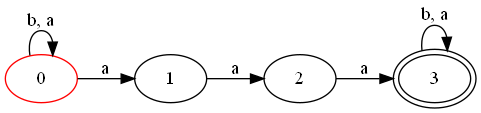

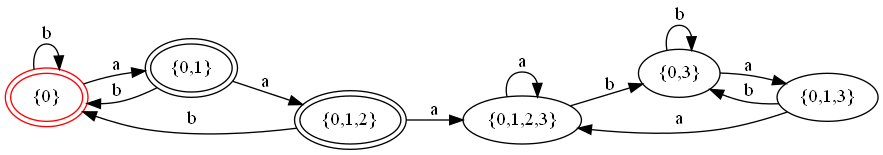

In [63]:
automate = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
automate.show()
Alphabet = {t.etiquette for t in auto.allTransitions}
auto_compl = automate.complementaire(Alphabet)
auto_compl.show(2)

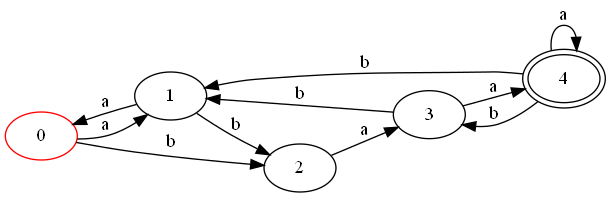

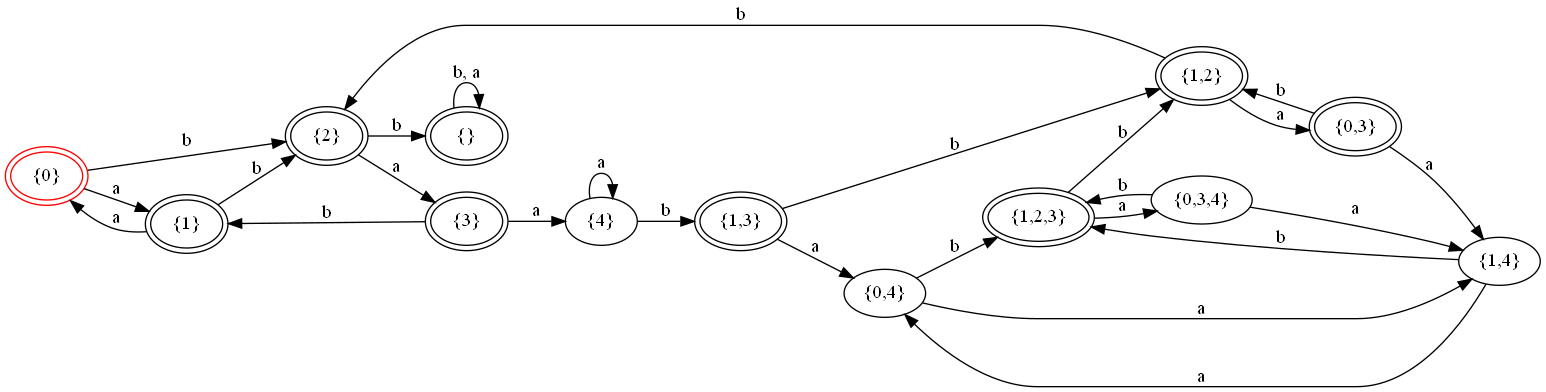

In [64]:
auto5.show()
Alphabet = {t.etiquette for t in auto5.allTransitions}
auto5_compl = auto5.complementaire(Alphabet)
auto5_compl.show(2)

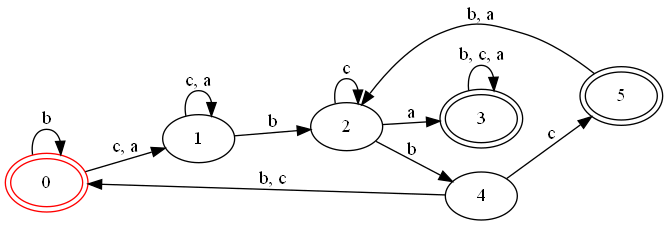

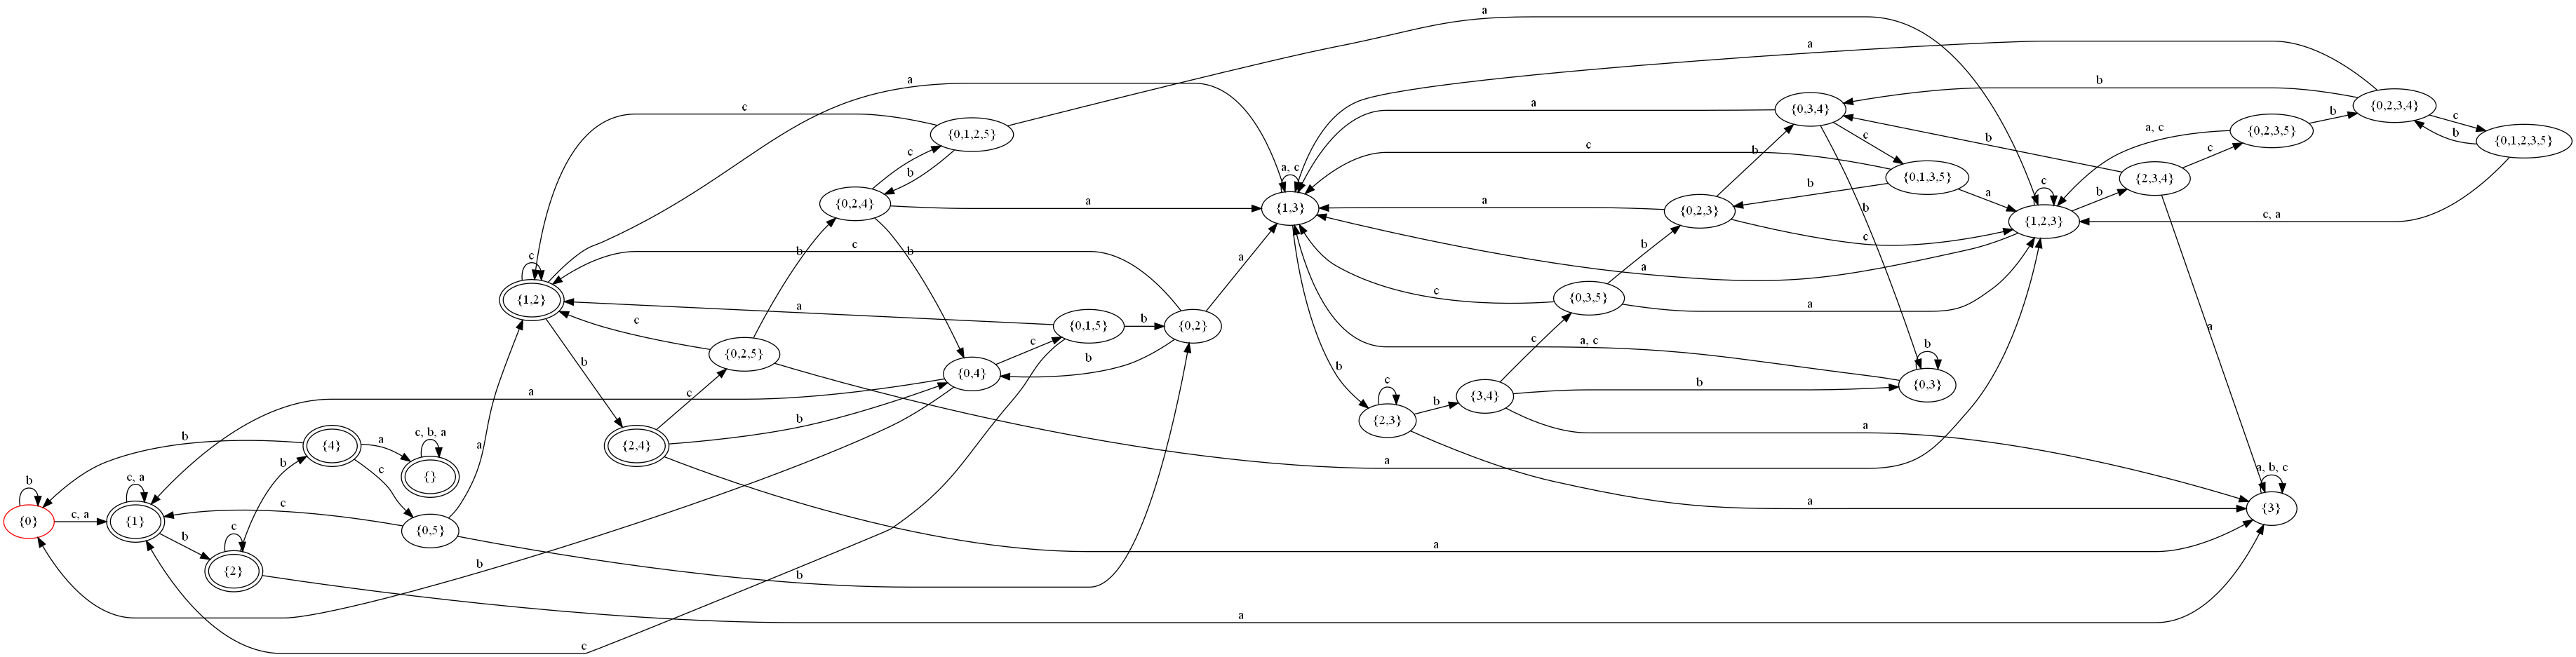

In [65]:
auto6.show()
Alphabet = {t.etiquette for t in auto6.allTransitions}
auto6_compl = auto6.complementaire(Alphabet)
auto6_compl.show(2)

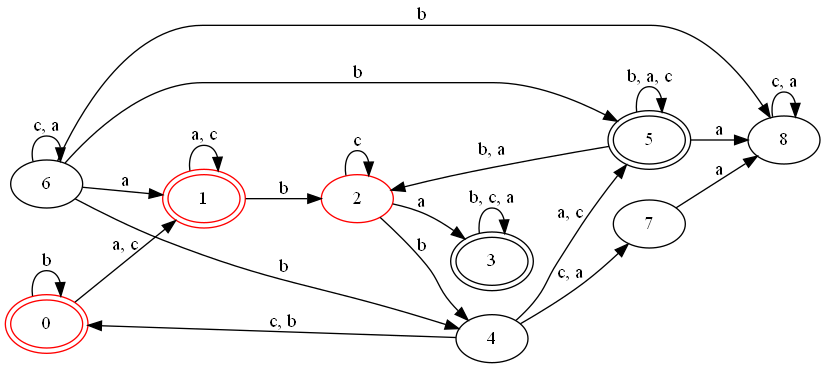

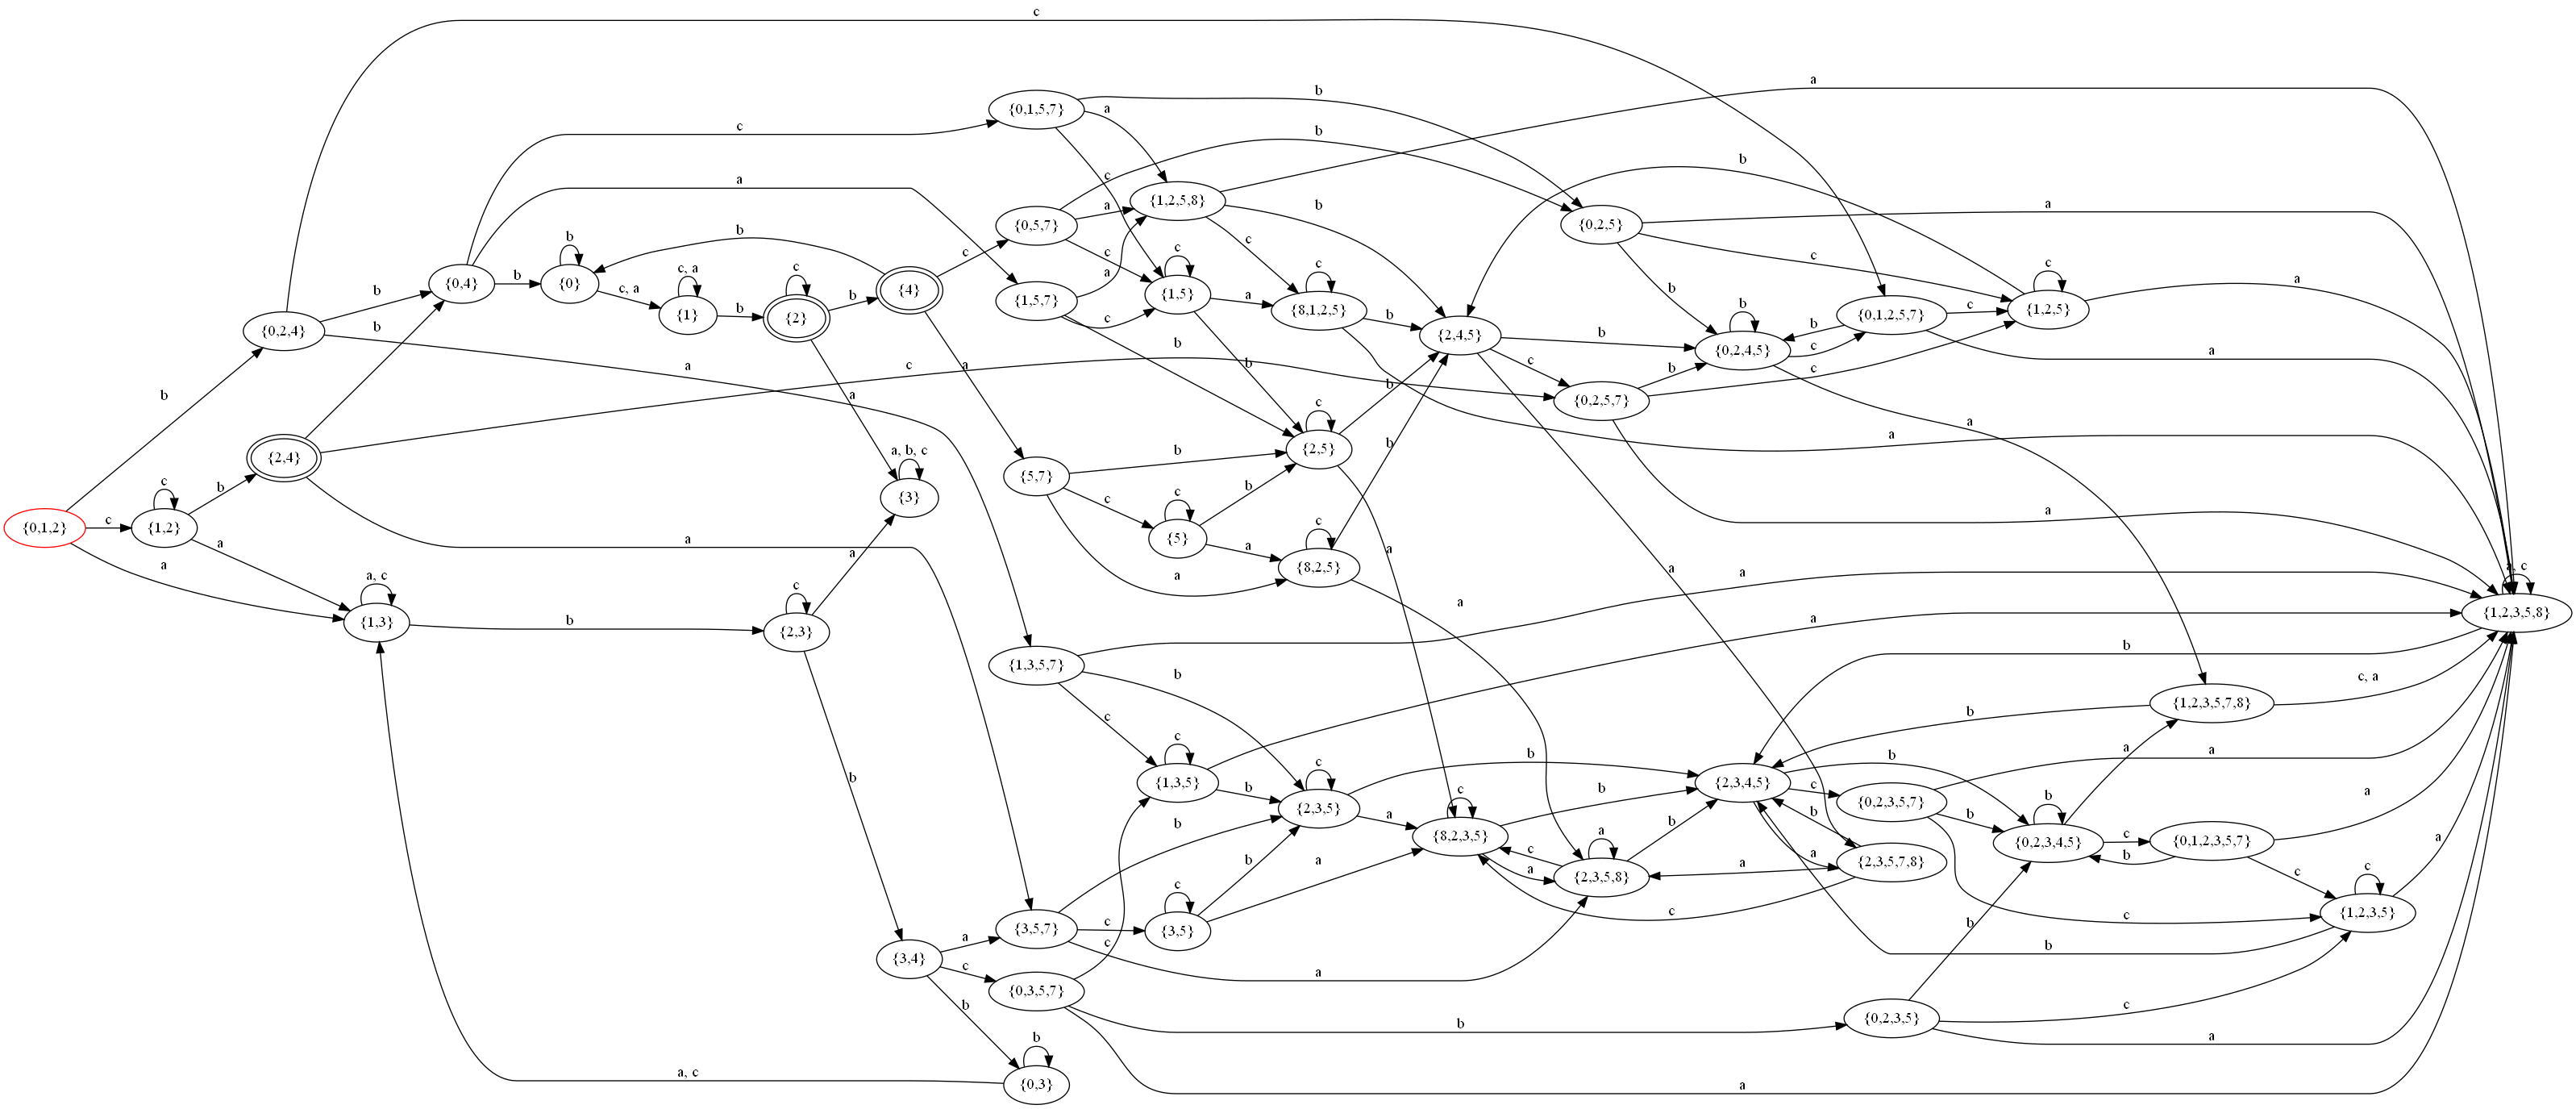

In [66]:
auto7.show()
Alphabet = {t.etiquette for t in auto7.allTransitions}
auto7_compl = auto7.complementaire(Alphabet)
auto7_compl.show(2)

### Test final des fonctions créées 

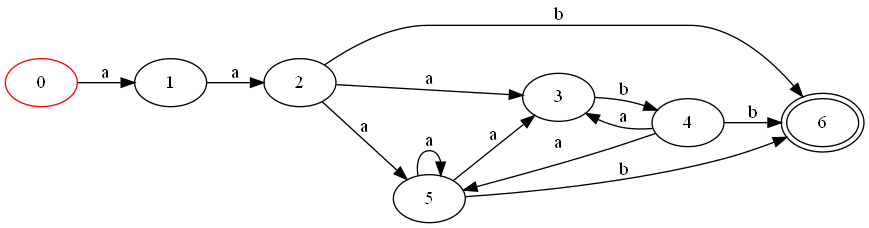

L'état: 2 possède 2 transitions sortant: a
Cet automate est-il déterministe : False


L'état: 0 ne possède pas de transition sortante: 'b'
Cet automate est-il complet : False

Complétion de l'automate


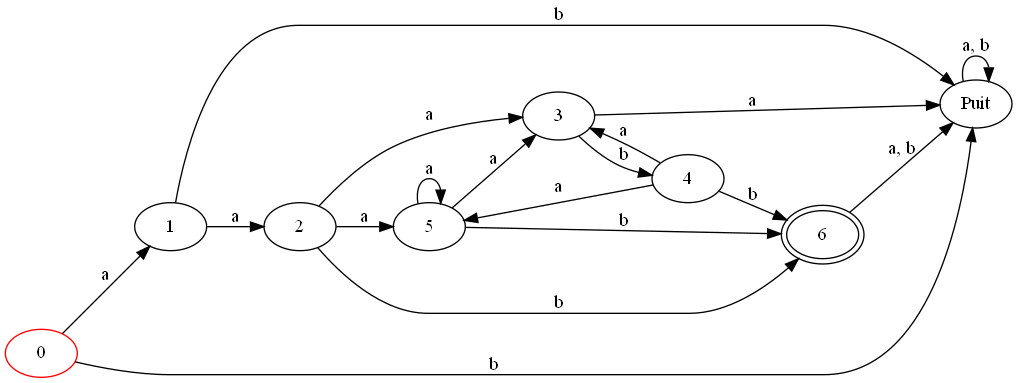

L'automate créé est il complet : True

Déterminisation de l'automate


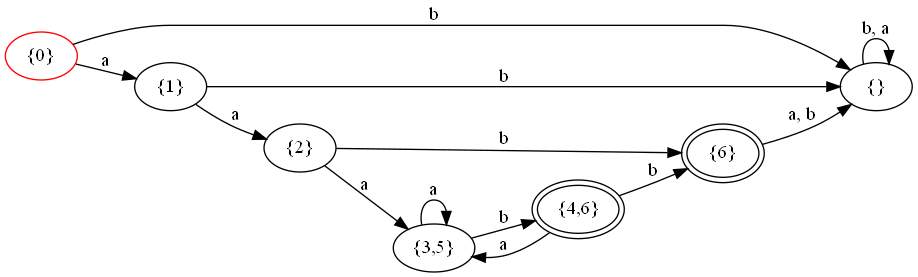

L'automate créé est il déterministe : True
L'automate créé est il complet : True

Complémentaire de l'automate


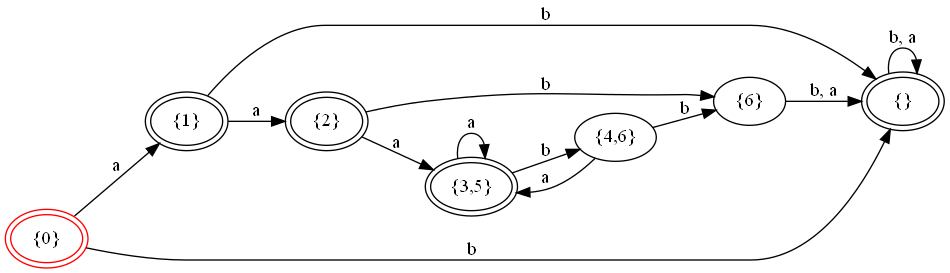

In [67]:
auto_gloushkov = Automate.creationAutomate("ExemplesAutomates/gloushkov.txt")
auto_gloushkov.show()
print("Cet automate est-il déterministe : " + str(auto_gloushkov.estDeterministe()))
print("\n")
print("Cet automate est-il complet : " + str(auto_gloushkov.estComplet({"a" , "b"})))
print("\nComplétion de l'automate")
auto_gloushkov_complet = auto_gloushkov.completeAutomate({"a" , "b"})
auto_gloushkov_complet.show()
print("L'automate créé est il complet : " + str( auto_gloushkov_complet.estComplet({"a" , "b"})))
print("\nDéterminisation de l'automate")
auto_gloushkov_det = auto_gloushkov.determinisation()
auto_gloushkov_det.show()
print("L'automate créé est il déterministe : " + str( auto_gloushkov_det.estDeterministe()))
print("L'automate créé est il complet : " + str( auto_gloushkov_det.estComplet({"a" , "b"})))
print("\nComplémentaire de l'automate")
auto_gloushkov_complemen = auto_gloushkov.complementaire({'a' , 'b'})
auto_gloushkov_complemen.show()

2. Donner une définition de la fonction `intersection` qui, étant donné deux automates `auto1` et `auto2`, renvoie l'automate acceptant l'intersection des langages acceptés par `auto1` et `auto2`.

L'automate construit ne doit pas avoir d'état non accessible depuis l'état initial.

In [68]:
def intersection(self, auto):
    """ Automate x Automate -> Automate
    rend l'automate acceptant pour langage l'intersection des langages des deux automates
    
    On s'en fou de compléter ou non
    """
    Alphabet =  {t.etiquette for t in auto.allTransitions}
    Etat = {}
    Liste_etats_a_traiter =[]
    deja_vu = {}
    
    final_states = [(x,y) for x in self.getSetFinalStates() for y in auto.getSetFinalStates()]
    init_states = [(x,y) for x in self.getSetInitialStates() for y in auto.getSetInitialStates()]
    
    new_auto = Automate(set(),set())
    i = 0
    for init_state in init_states:
        init_state_create = State(i, True , False ,  f"({init_state[0].label},{init_state[1].label})")
        new_auto.addState(init_state_create)
        Etat[init_state_create] = init_state
        Liste_etats_a_traiter.append(init_state_create)
        deja_vu[init_state] = init_state_create
        i+=1
        
    is_final = False
    etat_i = 0
    Liste_temp = []
    
    while True:
        
        if Liste_etats_a_traiter == []:
            break
        
        
        etat = Liste_etats_a_traiter[etat_i] # On récup l'état en cours de traitement
        
        etat1 , etat2 = Etat[etat] # On récup les états correspondants dans l'automate 1 et 2
        
        for lettre in Alphabet:
            
            # On récupère le états target dans l'auto1 et l'auto2
            succ_etat1 = list(self.succ({etat1} , lettre))
            succ_etat2 = list(auto.succ({etat2} , lettre))
            
            # On vérifie qu'existe pour l'etat à traiter des succ selon la lettre dans chacun des deux auto
            if len(succ_etat1) != 0 and len(succ_etat2) != 0:
                is_final = False
                
                # On calcul le produit cartésien donc les target de l'état à traiter 
                produit_cartesien = [(x , y) for x in succ_etat1 for y in succ_etat2]
                
                for new_st in produit_cartesien:
                    
                    # On verifie si la target est dans les finaux
                    if new_st in final_states:
                        is_final = True
                    
                    # On verifie si il est dans les déja vu
                    if new_st in deja_vu:
                        new_trans = Transition(etat , lettre , deja_vu[new_st])
                        new_auto.addTransition(new_trans)
                    else:
                        new_state = State(new_auto.nextId() , False, is_final , f"({new_st[0].label},{new_st[1].label})")
                        new_auto.addState(new_state)
                        new_trans = Transition(etat , lettre , new_state)
                        new_auto.addTransition(new_trans)
                        Liste_temp.append(new_state)
                        Etat[new_state] = new_st
                        deja_vu[new_st] = new_state
                        
        # Si on est a la fin de la liste on va pouvoir la modifier
        if etat_i == len(Liste_etats_a_traiter)-1:
            Liste_etats_a_traiter = copy.deepcopy(Liste_temp)
            Liste_temp = []
            etat_i = 0
        else:
            
            etat_i+= 1
    
    return new_auto
    
Automate.intersection = intersection

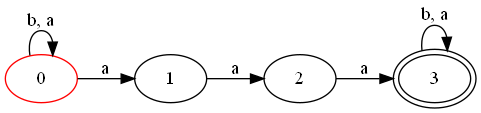

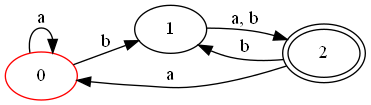

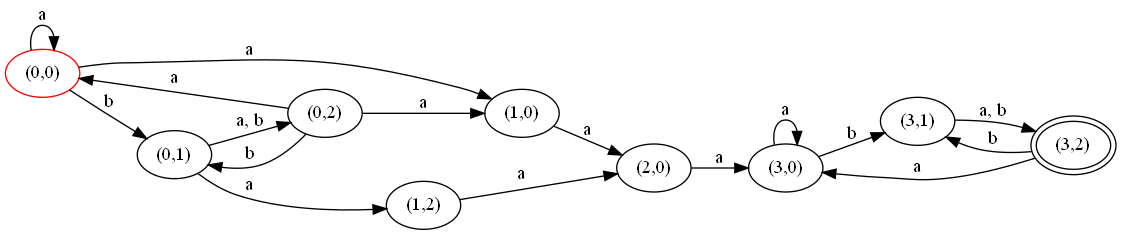

In [69]:
automate.show()
auto1.show()
inter = automate.intersection(auto1)


inter.show()

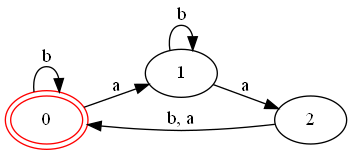

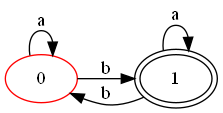

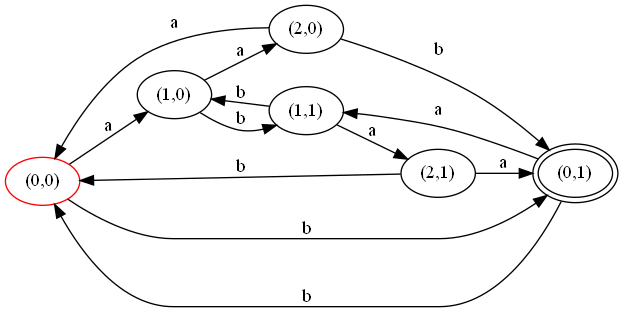

In [70]:
automateA = Automate.creationAutomate("ExemplesAutomates/autoA.txt")
automateA.show()
automateB = Automate.creationAutomate("ExemplesAutomates/autoB.txt")
automateB.show()
interAB = automateA.intersection(automateB)
interAB.show()

3. (Question facultative) Donner une définition de la fonction `union` qui, étant donné deux automates `auto1` `auto2`, renvoie l'automate acceptant comme langage l'union des langages acceptés par `auto1` et `auto2`.

In [71]:
#A faire par l'étudiant

def union (self, auto):
    """ Automate x Automate -> Automate
    rend l'automate acceptant pour langage l'union des langages des deux automates
    """
    Alphabet = {t.etiquette for t in auto.allTransitions}
    auto1_compl = self.completeAutomate(Alphabet)
    auto2_compl = auto.completeAutomate(Alphabet)
    
    Etat = {}
    Liste_etats_a_traiter =[]
    deja_vu = {}
    
    final_states = {(x,y) for x in auto1_compl.getSetFinalStates() for y in auto2_compl.allStates}|{(x,y) for x in auto1_compl.allStates for y in auto2_compl.getSetFinalStates()}
    
    init_states = [(x,y) for x in auto1_compl.getSetInitialStates() for y in auto2_compl.getSetInitialStates()]
    
    new_auto = Automate(set(),set())
    i = 0
    for init_state in init_states:
        init_state_create = State(i, True , False ,  f"{init_state[0].label}{init_state[1].label}")
        new_auto.addState(init_state_create)
        Etat[init_state_create] = init_state
        Liste_etats_a_traiter.append(init_state_create)
        deja_vu[init_state] = init_state_create
        i+=1
        
    is_final = False
    etat_i = 0
    Liste_temp = []
    
    while True:
        
        if Liste_etats_a_traiter == []:
            break
        
        
        etat = Liste_etats_a_traiter[etat_i] # On récup l'état en cours de traitement
        
        etat1 , etat2 = Etat[etat] # On récup les états correspondants dans l'automate 1 et 2
        
        for lettre in Alphabet:
            
            # On récupère le états target dans l'auto1 et l'auto2
            succ_etat1 = list(auto1_compl.succ({etat1} , lettre))
            succ_etat2 = list(auto2_compl.succ({etat2} , lettre))
            
            # On vérifie qu'existe pour l'etat à traiter des succ selon la lettre dans chacun des deux auto
            if len(succ_etat1) != 0 and len(succ_etat2) != 0:
                is_final = False
                
                # On calcul le produit cartésien donc les target de l'état à traiter 
                produit_cartesien = [(x , y) for x in succ_etat1 for y in succ_etat2]
                
                for new_st in produit_cartesien:
                    
                    # On verifie si la target est dans les finaux
                    if new_st in final_states:
                        is_final = True
                    
                    # On verifie si il est dans les déja vu
                    if new_st in deja_vu:
                        new_trans = Transition(etat , lettre , deja_vu[new_st])
                        new_auto.addTransition(new_trans)
                    else:
                        new_state = State(new_auto.nextId() , False, is_final , f"({new_st[0].label},{new_st[1].label})")
                        new_auto.addState(new_state)
                        new_trans = Transition(etat , lettre , new_state)
                        new_auto.addTransition(new_trans)
                        Liste_temp.append(new_state)
                        Etat[new_state] = new_st
                        deja_vu[new_st] = new_state
                        
        # Si on est a la fin de la liste on va pouvoir la modifier
        if etat_i == len(Liste_etats_a_traiter)-1:
            Liste_etats_a_traiter = copy.deepcopy(Liste_temp)
            Liste_temp = []
            etat_i = 0
        else:
            etat_i+= 1
    
    return new_auto
    
    

Automate.union = union  


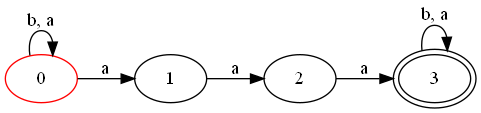

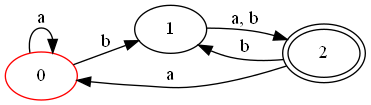

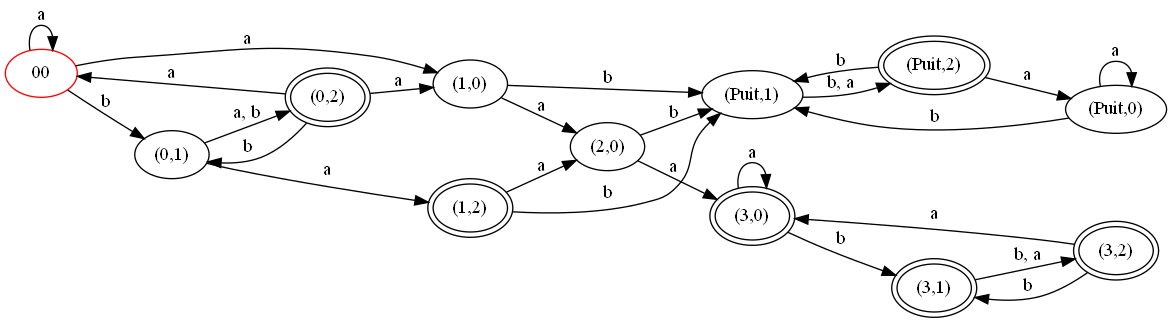

In [72]:
automate.show()
auto1.show()
uni = automate.union(auto1)
uni.show(2)

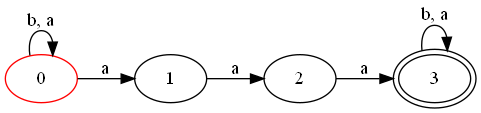

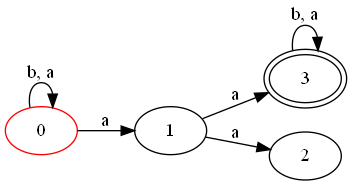

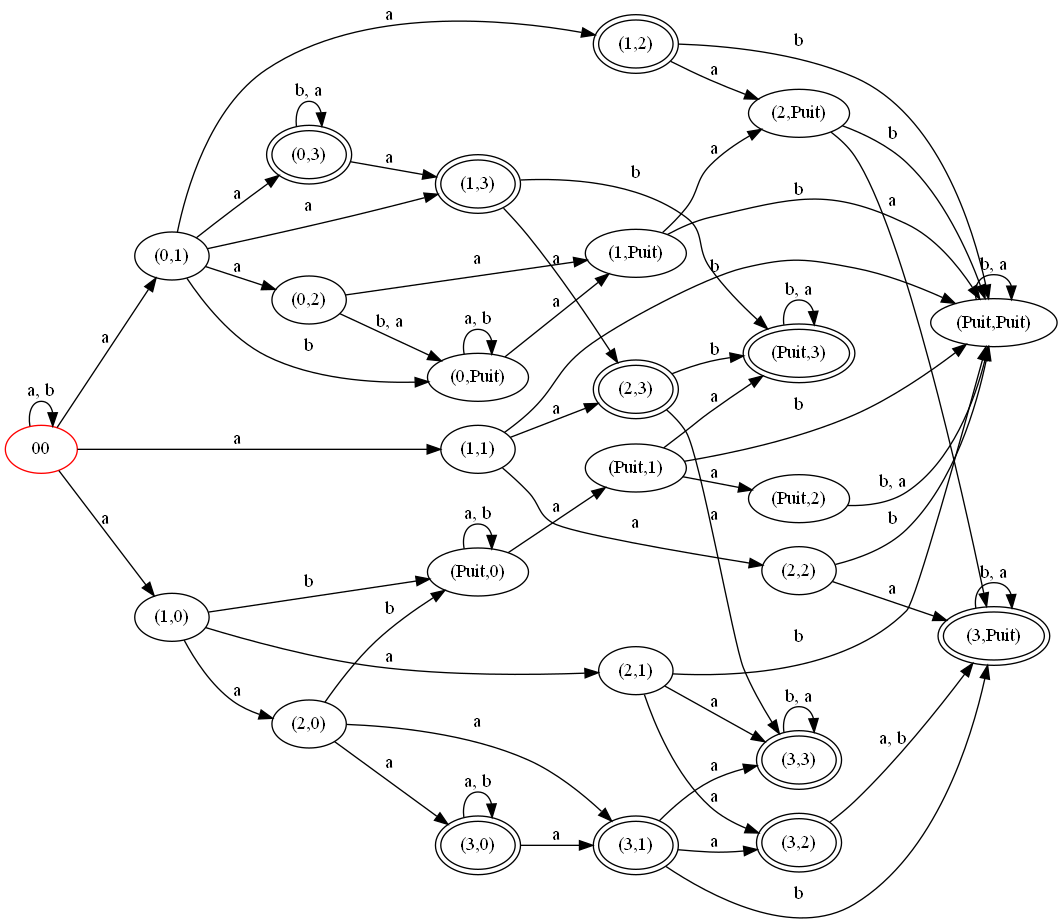

In [73]:
automate.show()
auto2.show()
uni2 = automate.union(auto2)
uni2.show()

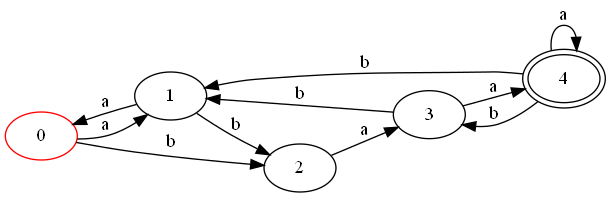

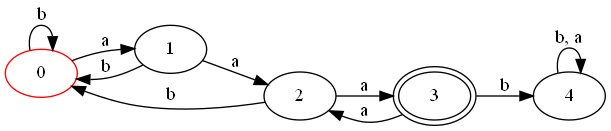

Intersection : 


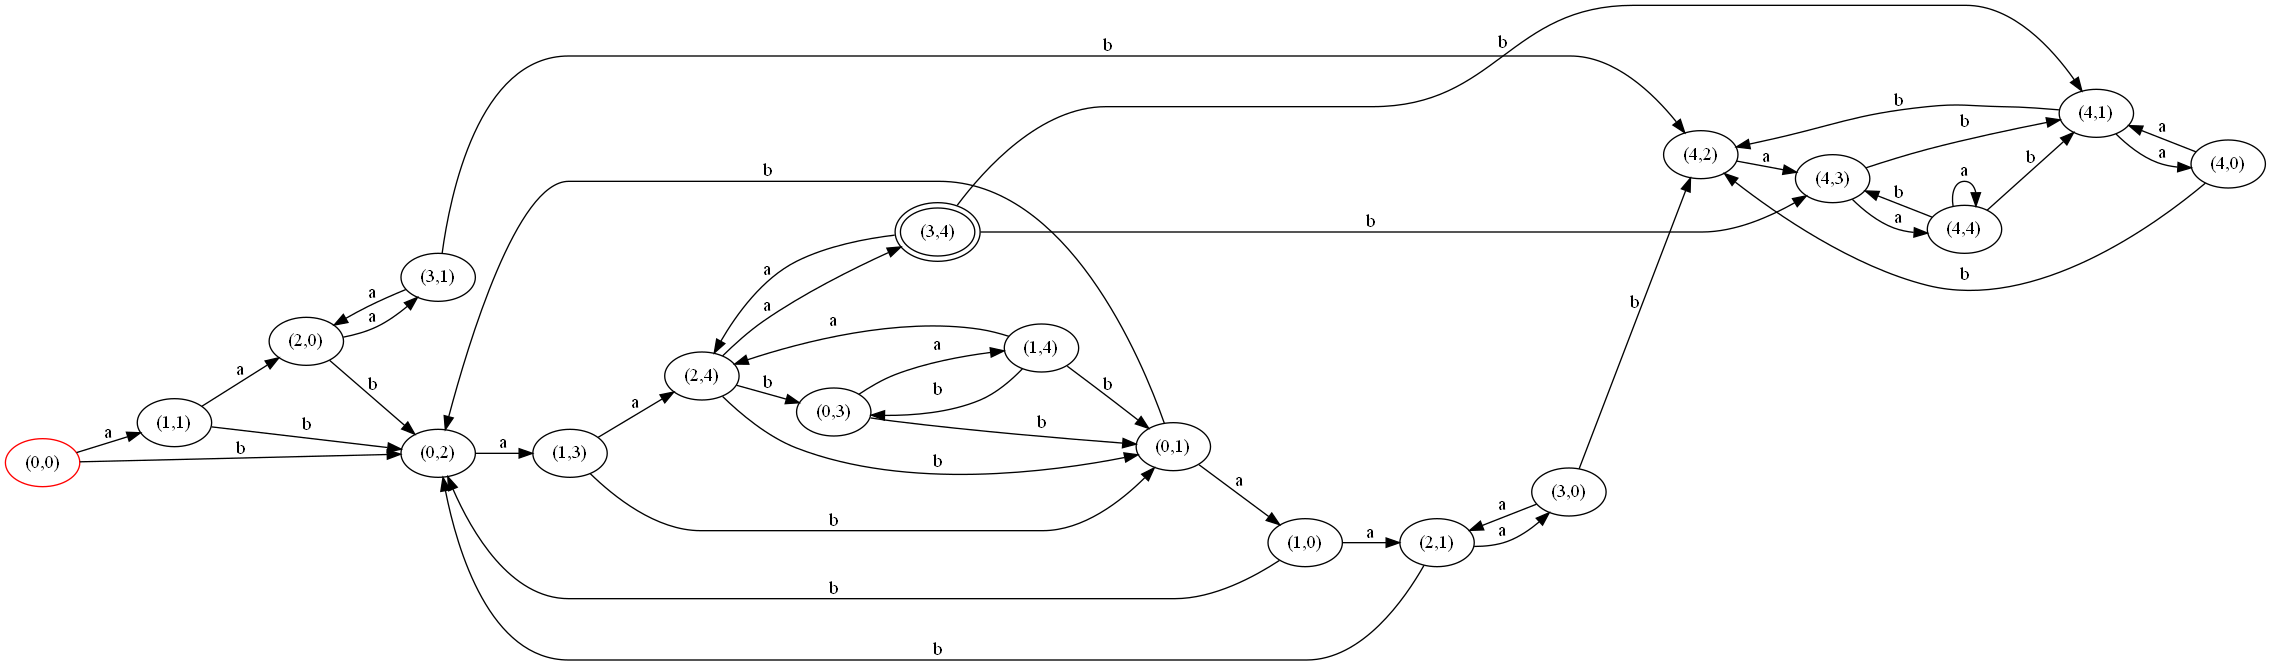

Union : 


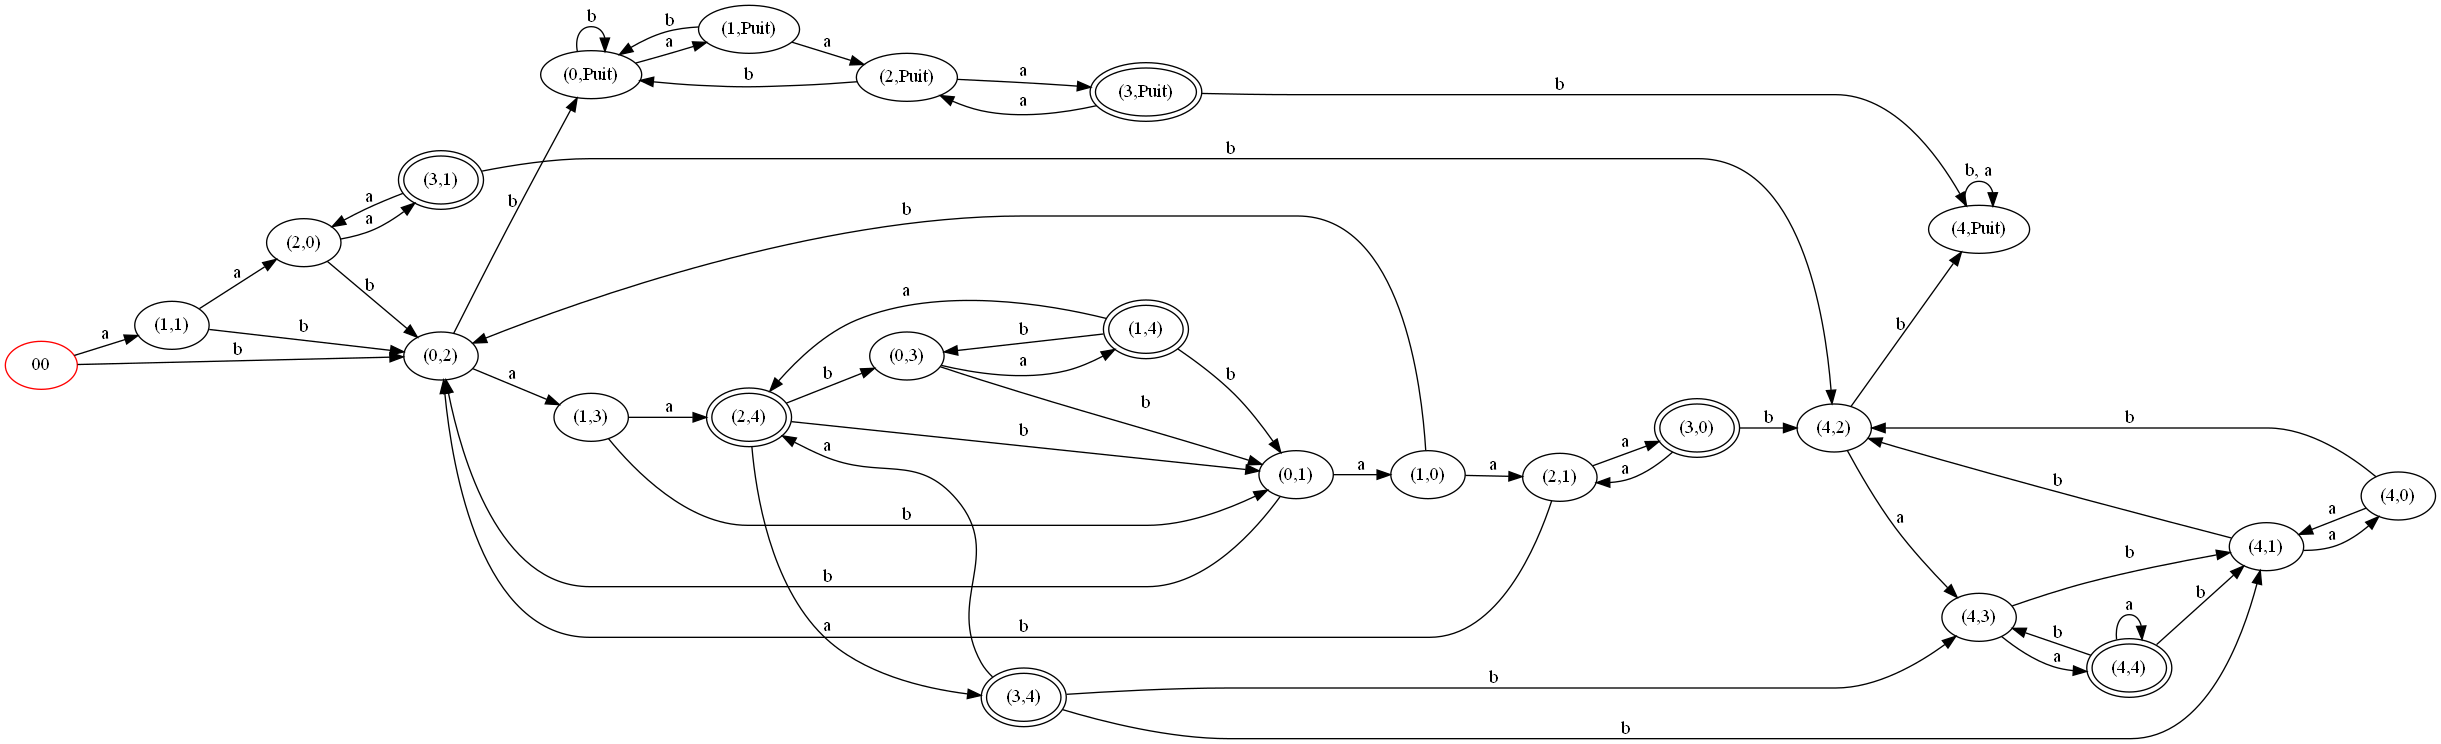

In [74]:
auto5.show()
auto4.show()
inter4t5 = auto4.intersection(auto5)
print("Intersection : ")
inter4t5.show(3)
uni4t5 = auto4.union(auto5)
print("Union : ")
uni4t5.show(3)

#### 5.2 Opérations rationnelles sur les langages <a class="anchor" id="sec5_2"></a>

Programmer *une des deux* méthodes suivantes:

1. Donner une définition de la fonction `concatenation` qui, étant donné deux automates `auto1` et `auto2`, renvoie l'automate acceptant comme langage la concaténation des langages acceptés par `auto1` et `auto2`.

2. Donner une définition de la fonction `etoile` qui, étant donné un automate `auto`, renvoie l'automate acceptant comme langage l'étoile du langages accepté par `auto`.

### Je teste une autre méthode 

### Supression des epsilons transitions TROIS METHODES DIFFERENTES JE NE COMPREND PAS PK
https://www.youtube.com/watch?v=BrzssYsXMkI&t=162s

https://youtu.be/PhT871js0Kk

https://www.youtube.com/watch?v=WSGcmaHNBFM

### Création de l'automate asynchrone avec epsilon transitions



In [75]:
def chemin_eps(auto , state):
    """Cette fonction permet de chercher tous les chemins en passant par des epsilons """
    set_states = set()
    set_states.add(state)
    succ_eps = auto.succ({state} , "e")
    while True:
        
        if succ_eps == set():
            break
        if succ_eps.issubset(set_states):
            break
            
        set_states |= succ_eps
        succ_eps_future = auto.succ(succ_eps , "e")
        succ_eps = succ_eps_future            
    return set_states

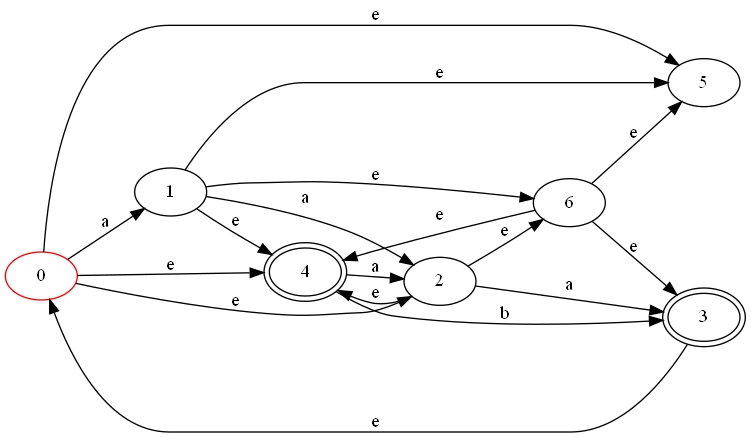

0(init)
{0(init), 2, 3(fin), 4(fin), 5, 6}
1
{0(init), 1, 2, 3(fin), 4(fin), 5, 6}
2
{0(init), 2, 3(fin), 4(fin), 5, 6}
3(fin)
{0(init), 2, 3(fin), 4(fin), 5, 6}
4(fin)
{4(fin)}
5
{5}
6
{0(init), 2, 3(fin), 4(fin), 5, 6}


In [76]:
automate_big_eps = Automate.creationAutomate("ExemplesAutomates/auto_big_eps.txt")
automate_big_eps.show()
allstates_big = automate_big_eps.allStates
for i in allstates_big:
    print(i)
    print(chemin_eps(automate_big_eps, i ))

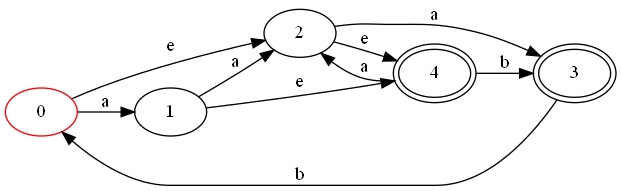

0(init)
{0(init), 2, 4(fin)}
1
{1, 4(fin)}
2
{2, 4(fin)}
3(fin)
{3(fin)}
4(fin)
{4(fin)}


In [77]:
automate_eps = Automate.creationAutomate("ExemplesAutomates/auto_eps.txt")
allstates = automate_eps.allStates
automate_eps.show()
for i in allstates:
    print(i)
    print(chemin_eps(automate_eps, i ))

In [78]:
def remove_eps(self):
    """ Prend en paramètre un automate asynchrone avec epsilon transition
    et supprime les epsilon transitions"""
    
    new_automate = copy.deepcopy(self)
    
    Alphabet_moins_eps = {t.etiquette for t in self.allTransitions if t.etiquette!="e"}
    
    init_states = new_automate.getSetInitialStates()
    final_states = new_automate.getSetFinalStates()
    
    liste_states = new_automate.allStates
    
    for state in liste_states:
        
        eps_clos1 = []
        eps_clos2 = []
        trans = set()
        
        eps_clos1 = chemin_eps(new_automate , state) # Tous les noeud atteints avec une suite d'epsilons
        
        if (eps_clos1 & final_states) != set():
        #if (eps_clos1 <= final_states): # Tous les states possèdant un chemin d'epsilons vers un final devient final
            state.fin = True
    
        for eps_c1 in eps_clos1:
            for lettre in Alphabet_moins_eps:
                
                trans = new_automate.succ({eps_c1} , lettre)
                
                for tran in trans:
                    eps_clos2 = chemin_eps(new_automate , tran)
                    
                    for eps_c2 in eps_clos2:
                        new_trans = Transition(state , lettre , eps_c2)
                        new_automate.addTransition(new_trans)
                        
#                 for tran in trans:
#                     new_trans = Transition(state , lettre , tran)
#                     new_automate.addTransition(new_trans)
                    
    
    
    
    
    last_copy = copy.deepcopy(new_automate)
    # Suppression des transitions epsilons
    t_eps = [t for t in last_copy.allTransitions if t.etiquette == "e"]
    for t in t_eps:
        if t.etiquette == "e":
            last_copy.removeTransition(t)

    
    return last_copy
    

Automate.remove_eps = remove_eps

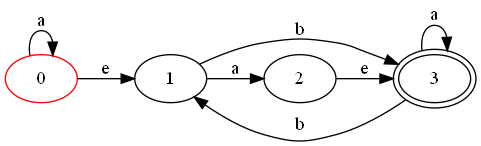

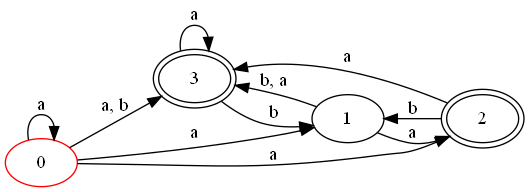

In [79]:
auto_test_conca_vid = Automate.creationAutomate("ExemplesAutomates/test_conca_video.txt")
auto_test_conca_vid.show()
result_test = auto_test_conca_vid.remove_eps()
result_test.show()

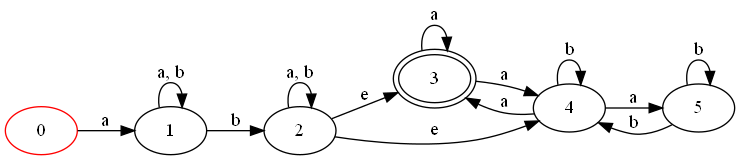

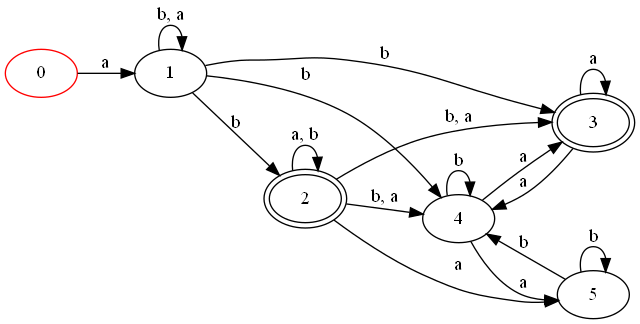

In [80]:
auto_test_conca1 = Automate.creationAutomate("ExemplesAutomates/auto_conca_test.txt")
auto_test_conca1.show()
auto_result = auto_test_conca1.remove_eps()
auto_result.show()

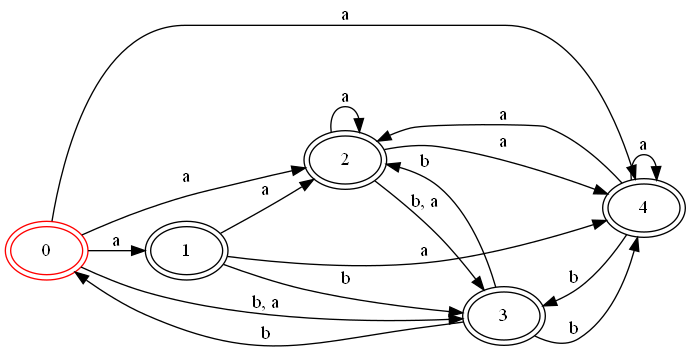

In [81]:
automate_eps = Automate.creationAutomate("ExemplesAutomates/auto_eps.txt")
auto_sse = automate_eps.remove_eps()

        
auto_sse.show()

In [82]:
def concatenation (self, auto):
    """ Automate x Automate -> Automate
    rend l'automate acceptant pour langage la concaténation des langages des deux automates
    """
    copy_self = copy.deepcopy(self)
    copy_auto = copy.deepcopy(auto)
    label_id = copy_self.nextId()
    

    for s in copy_auto.allStates:
        s.id = label_id
        s.label = str(label_id)
        label_id += 1
    
    new_trans = copy.deepcopy(copy_auto.allTransitions)
    new_automate = Automate(new_trans)
    
    new_automate_trans = new_automate.allTransitions
    copy_self_trans = copy_self.allTransitions
    
    new_automate_states_start = new_automate.getSetInitialStates()
    copy_self_states_end = copy_self.getSetFinalStates()
    
    copy_self_states = copy_self.allStates
    new_automate_states = new_automate.allStates
    States = (copy_self_states | new_automate_states)
    
    add_trans = set()
    for F1 in copy_self_states_end:
        F1.fin = False
        for I2 in  new_automate_states_start:
            I2.init = False
            new_trans = Transition(F1 , "e" , I2)
            add_trans.add(new_trans)
            
    Transitions = ( new_automate_trans | copy_self_trans | add_trans )
    
    last_automate = Automate(Transitions , States)
    
    print("Voici l'automate asynchrone avec ses epsilon transitions :")
    last_automate.show(2)
    
    print("Voici l'automate resultat de la concaténation : ")
    return last_automate.remove_eps()

Automate.concatenation = concatenation

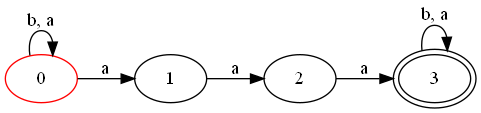

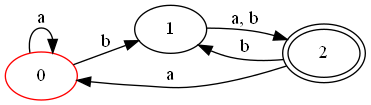

Voici l'automate asynchrone avec ses epsilon transitions :


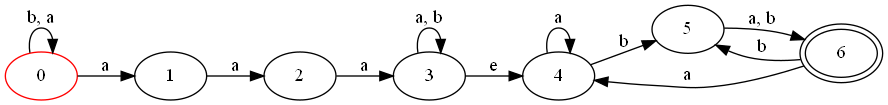

Voici l'automate resultat de la concaténation : 


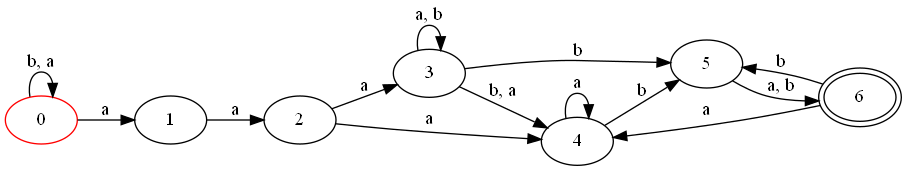

In [83]:
automate.show()
auto1.show()
conca = automate.concatenation(auto1)
conca.show(2)

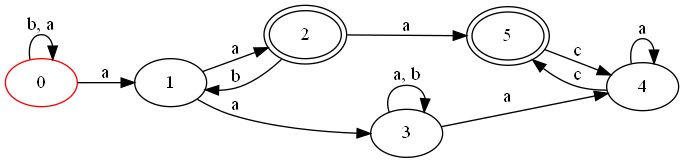

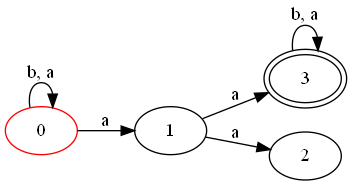

Voici l'automate asynchrone avec ses epsilon transitions :


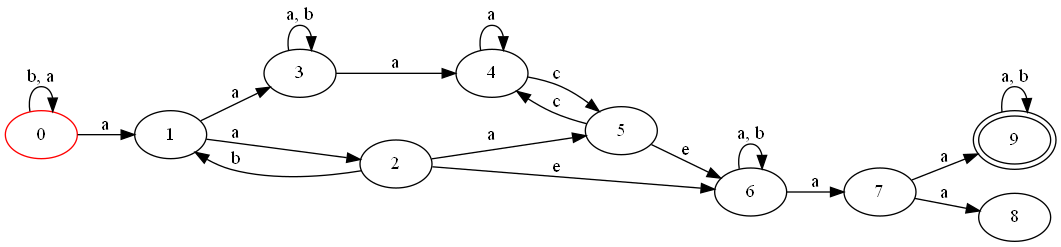

Voici l'automate resultat de la concaténation : 


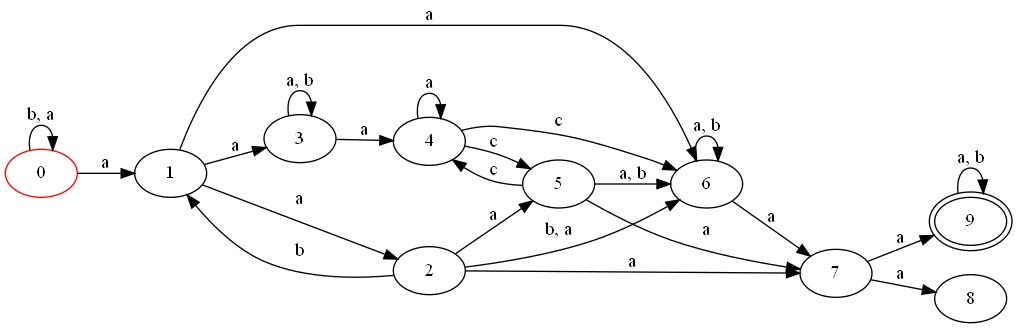

In [84]:
auto3.show()
auto2.show()
conca2 = auto3.concatenation(auto2)
conca2.show(2)

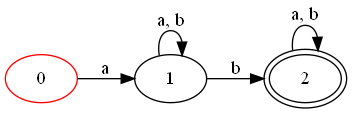

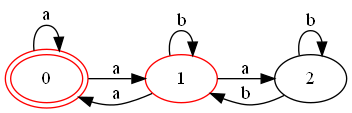

Voici l'automate asynchrone avec ses epsilon transitions :


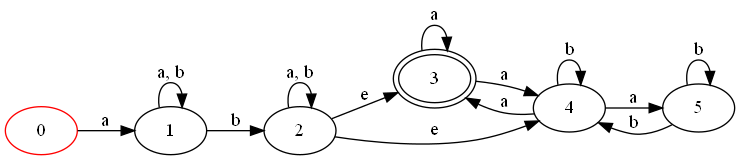

Voici l'automate resultat de la concaténation : 


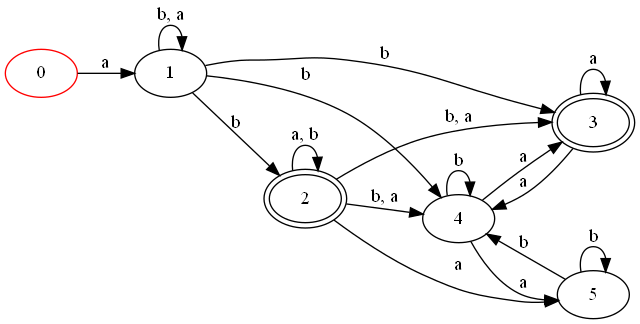

In [85]:
conca1 = Automate.creationAutomate("ExemplesAutomates/auto_conca1.txt")
conca2 = Automate.creationAutomate("ExemplesAutomates/auto_conca2.txt")
conca1.show()
conca2.show()
conca_r = conca1.concatenation(conca2)
conca_r.show(2)

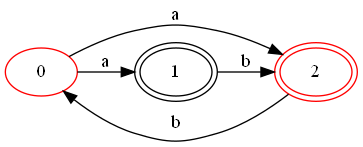

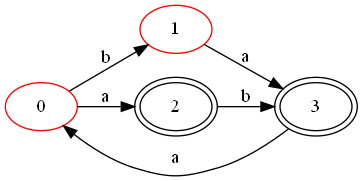

Voici l'automate asynchrone avec ses epsilon transitions :


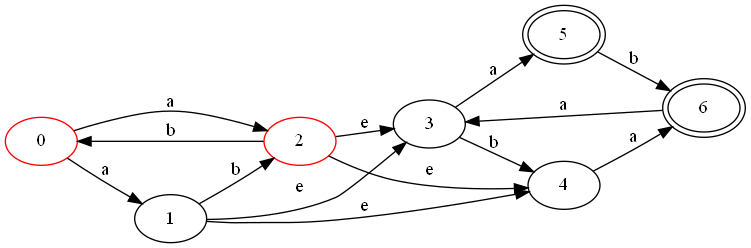

Voici l'automate resultat de la concaténation : 


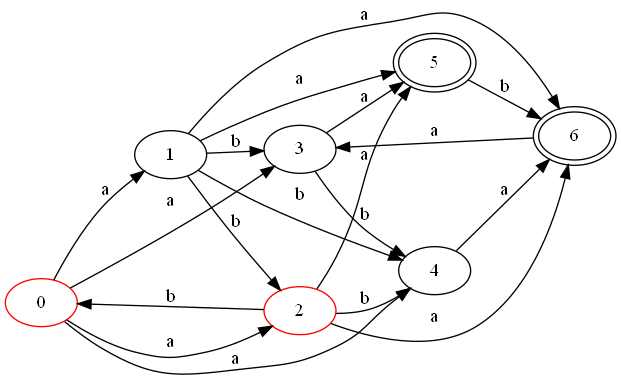

In [86]:
conca1prime = Automate.creationAutomate("ExemplesAutomates/auto_conca1prime.txt")
conca2prime = Automate.creationAutomate("ExemplesAutomates/auto_conca2prime.txt")
conca1prime.show()
conca2prime.show()
conca_r2 = conca1prime.concatenation(conca2prime) 
conca_r2.show()

In [87]:
def etoile (self):
    """ Automate  -> Automate
    rend l'automate acceptant pour langage l'étoile du langage de a
    """
   
    copie = copy.deepcopy(self)
    transition_de_fin = [transition for transition in copie.allTransitions if transition.stateDest in copie.getSetFinalStates()]

    for etat in copie.getSetInitialStates():
        for t in transition_de_fin:
            # t1 : Transition
            trans = Transition(t.stateSrc, t.etiquette, etat)
            copie.addTransition(trans)
   
    # s0 : State
    s = State(self.nextId(), True, True,"eps")
    copie.addState(s)
   
    return  copie

Automate.etoile = etoile

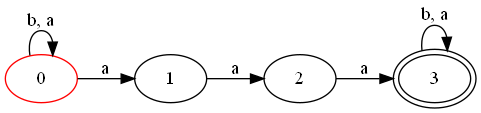

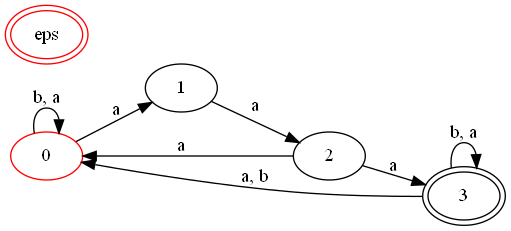

In [88]:
automate.show()
autoetoile = automate.etoile()
autoetoile.show()

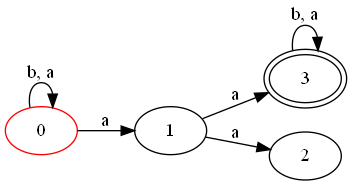

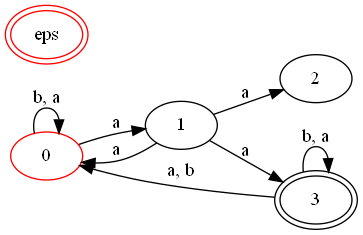

In [89]:
auto2.show()
auto2etoile = auto2.etoile()
auto2etoile.show()

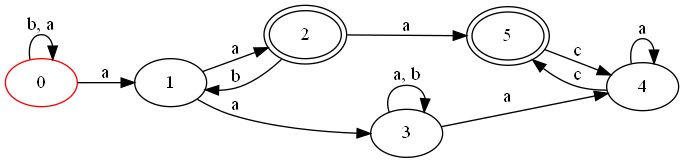

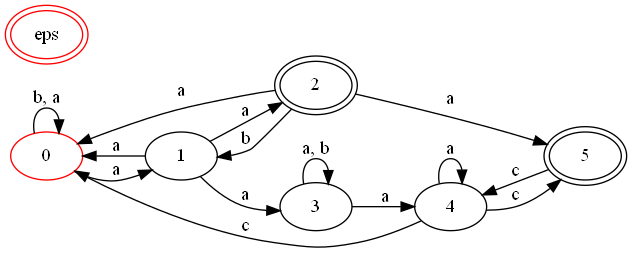

In [90]:
auto3.show()
auto3etoile = auto3.etoile()
auto3etoile.show()